In [ ]:
#https://raw.githubusercontent.com/salemprakash/EDA/main/Data/supermarket_sales.csv

#GitHub Link : https://github.com/Abhhub/EDA-22BCE3914


# **1: Dataset Loading and Exploration + Data Handling/Cleaning**


In [6]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/supermarket_sales.csv')


In [8]:
#exploring the dataset

print(df.columns) #columns of dataset

df.head() #first few rows of dataset



Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   01/05/19   
1  Electronic accessories       15.28         5   3.8200   80.2200   03/08/19   
2      Home and lifestyle       46.33         7  16.2155  340.5255   03/03/19   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   02/08/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [9]:
# Dimensions and summary of the Dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
df.info()
# Statistical summary
df.describe()

The dataset contains 1000 rows and 17 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   998 non-null    object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  999 non-null    object 
 13  cogs                     1000 no

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             9.990000e+02   1000.000000  999.000000  
mean              4.761905e+00     15.379369    6.973373  
std               6.131501e-14     11.708825    1.719309  
min               4.761905e+00      0.508500    4.000000  
25%               4.761905e+00      5.924875    5.500000  
50%               4.761905e+00     12.088000    7.000000  
75%               4.761905e+00     22.445250    8.500000  
max               4.761905e+00     49.650000   10.000000

In [10]:
#Handling dataset by checking for missing values and filling the missing values with median and mode

# Checking for missing values before data handling
print(df.isnull().sum())


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     2
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    1
cogs                       0
gross margin percentage    1
gross income               0
Rating                     1
dtype: int64


In [11]:

#Separating numeric and non numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

# Filling missing values for numeric columns with the median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Filling missing values for non-numeric columns with the mode (most frequent value)
for col in non_numeric_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

#Checking for any remaining missing values after data handling
print(df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


<ipython-input-11-68b28d0d551c>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [12]:
#checking for unmatched data in customer type rows
print(df['Customer type'].unique())
print(df['Customer type'].value_counts())

['Member' 'Normal' '?' '>']
Customer type
Member    501
Normal    497
?           1
>           1
Name: count, dtype: int64


In [13]:

#removing the rows containing '?' and '>' from the customer type column
df = df[df['Customer type'].isin(['Member', 'Normal'])]

#checking the customer type column again
print(df['Customer type'].unique())
print(df['Customer type'].value_counts())

# Remove rows where Gender is '?'
df = df[df['Gender'] != '?']

# Reset index after dropping
df.reset_index(drop=True, inplace=True)

# Verify that '?' values are removed
print(df['Gender'].unique())


['Member' 'Normal']
Customer type
Member    501
Normal    497
Name: count, dtype: int64
['Female' 'Male']


In [14]:
# Removing duplicates
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
# Remove duplicates
df = df.drop_duplicates()
print(f"Shape of dataset without duplicates: {df.shape}")

Number of duplicate rows: 0
Shape of dataset without duplicates: (997, 17)


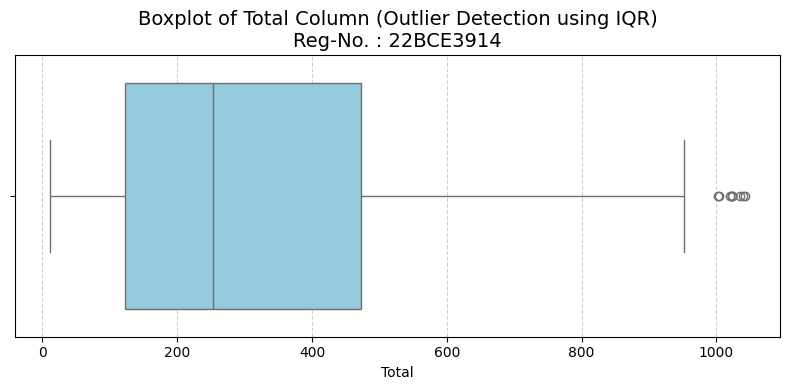

In [15]:
#visualizing Boxplot to detect outliers:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Total'], color='skyblue')
plt.title('Boxplot of Total Column (Outlier Detection using IQR)\nReg-No. : 22BCE3914', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




In [16]:
#Removing outliers using IQR
# calculate Q1, Q3, and IQR for the 'Total' column
Q1 = df['Total'].quantile(0.25)
Q3 = df['Total'].quantile(0.75)
IQR = Q3 - Q1

# lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Q3 - Q1): {IQR}")
print(f"Outlier threshold -> lower than {lower_bound} or higher than {upper_bound}")

# filter out the outliers with the help of bounds
df_filtered = df[(df['Total'] >= lower_bound) & (df['Total'] <= upper_bound)]

print(f"Original shape: {df.shape}")
print(f"Filtered shape (without outliers): {df_filtered.shape}")


Q1 (25th percentile): 122.5245
Q3 (75th percentile): 472.311
IQR (Q3 - Q1): 349.7865
Outlier threshold -> lower than -402.15525 or higher than 996.9907499999999
Original shape: (997, 17)
Filtered shape (without outliers): (988, 17)


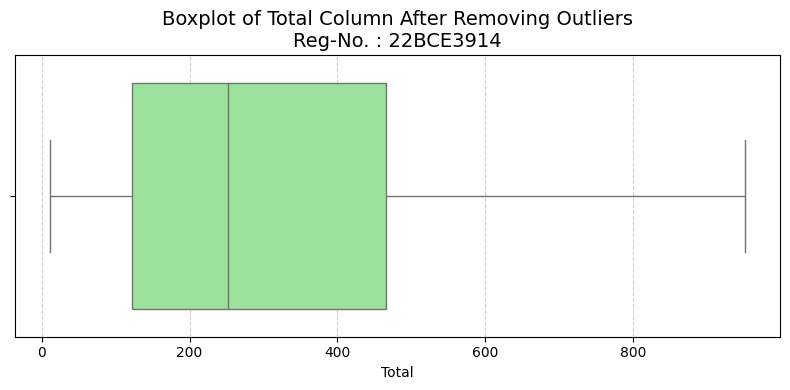

In [17]:
#visualizing boxplot after filtering outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_filtered['Total'], color='lightgreen')
plt.title('Boxplot of Total Column After Removing Outliers\nReg-No. : 22BCE3914', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# ANALYSIS : Univariate

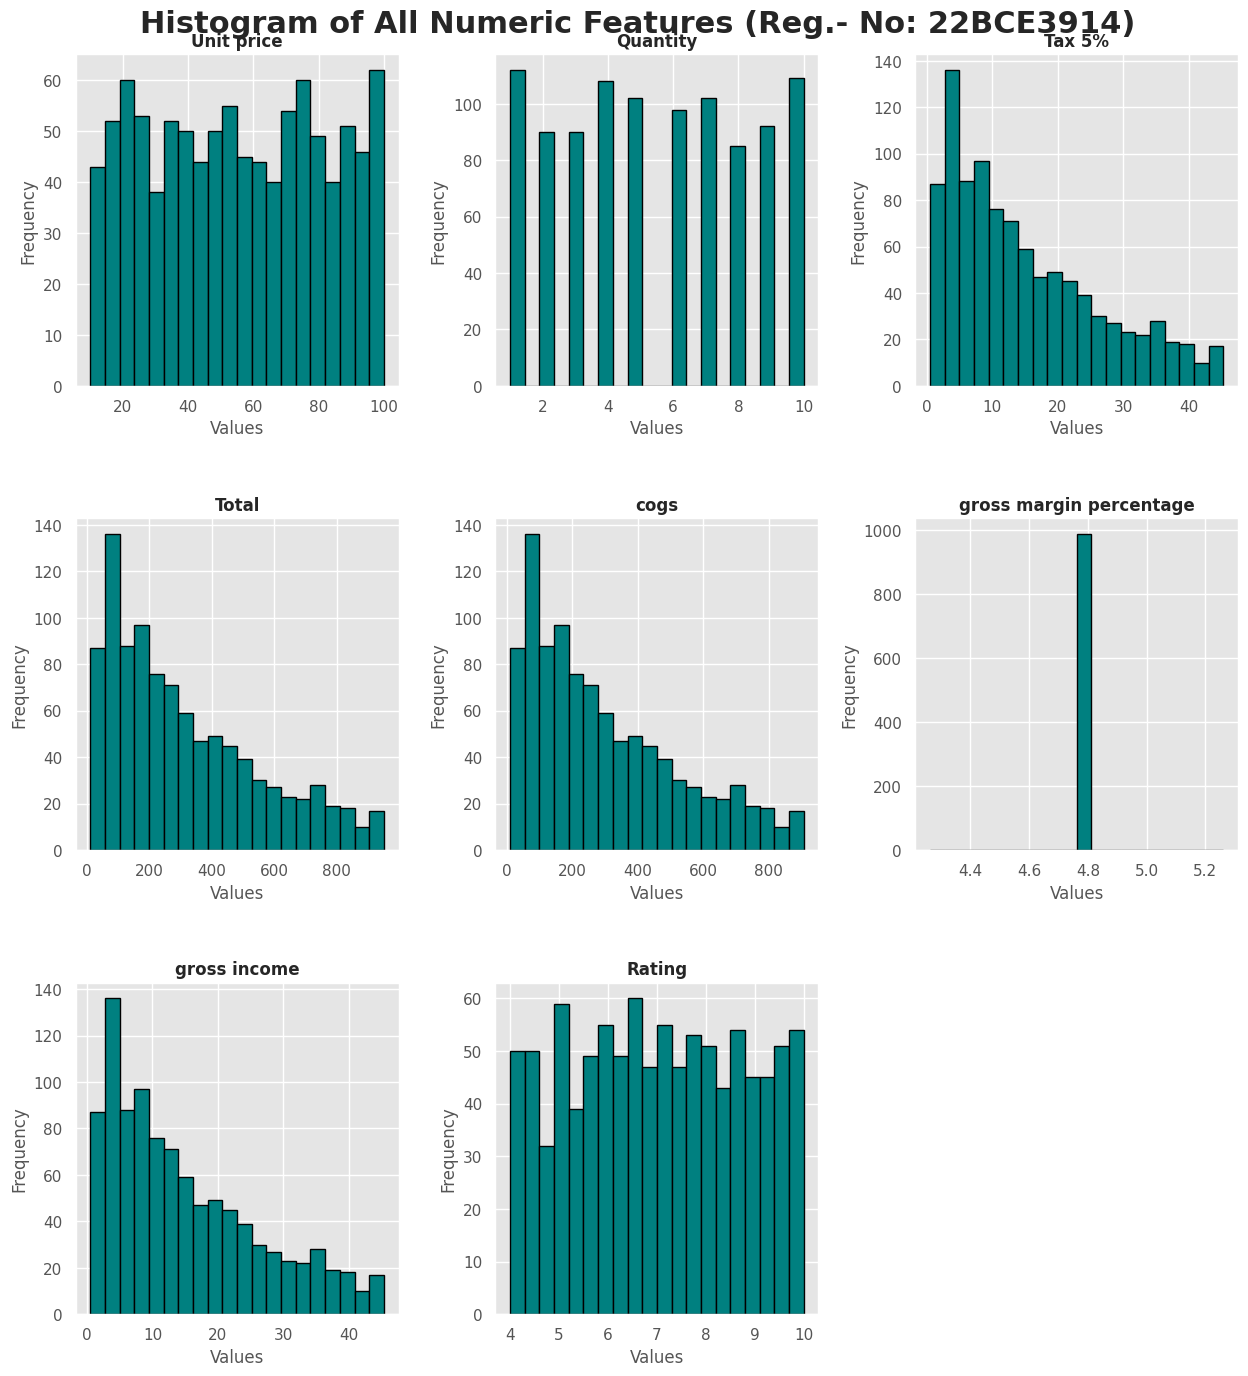

In [18]:
#Histogram for All Numeric Columns

sns.set(style="whitegrid")
plt.style.use('ggplot')

color = '#008080'

# Select numeric columns
df_numeric = df_filtered.select_dtypes(include=['float64', 'int64'])

num_features = len(df_numeric.columns)
num_cols = 3
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(df_numeric.columns):
    ax = axes[i]
    df_numeric[column].plot(kind='hist', ax=ax, bins=20, color=color, edgecolor='black', linewidth=1.0)
    ax.set_title(column, fontsize=12, weight='bold')
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Histogram of All Numeric Features (Reg.- No: 22BCE3914)', fontsize=22, weight='bold')
plt.subplots_adjust(top=0.95, hspace=0.4, wspace=0.3)
plt.show()


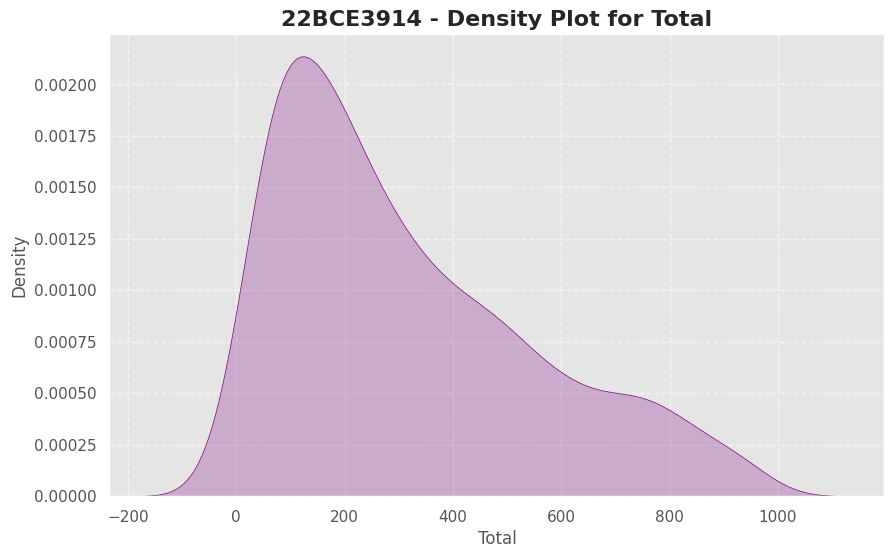

In [19]:
#Density Plot for Total column

plt.figure(figsize=(10, 6))
sns.kdeplot(df_filtered['Total'], color='purple', fill=True)
plt.title("22BCE3914 - Density Plot for Total", fontsize=16, weight='bold')
plt.xlabel("Total")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


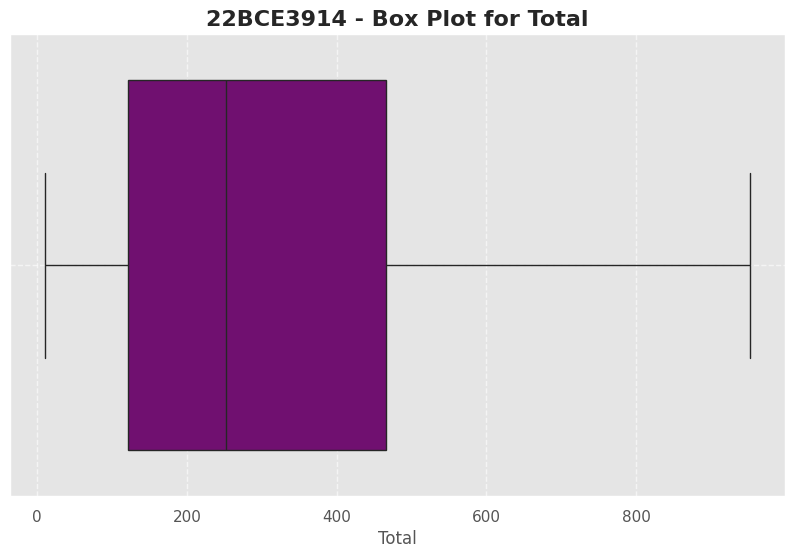

In [20]:
#Box Plot for Total column

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['Total'], color='purple')
plt.title("22BCE3914 - Box Plot for Total", fontsize=16, weight='bold')
plt.xlabel("Total")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


<ipython-input-21-9e0b402c842d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment', data=df_filtered, palette=colors)
<ipython-input-21-9e0b402c842d>:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(x='Payment', data=df_filtered, palette=colors)


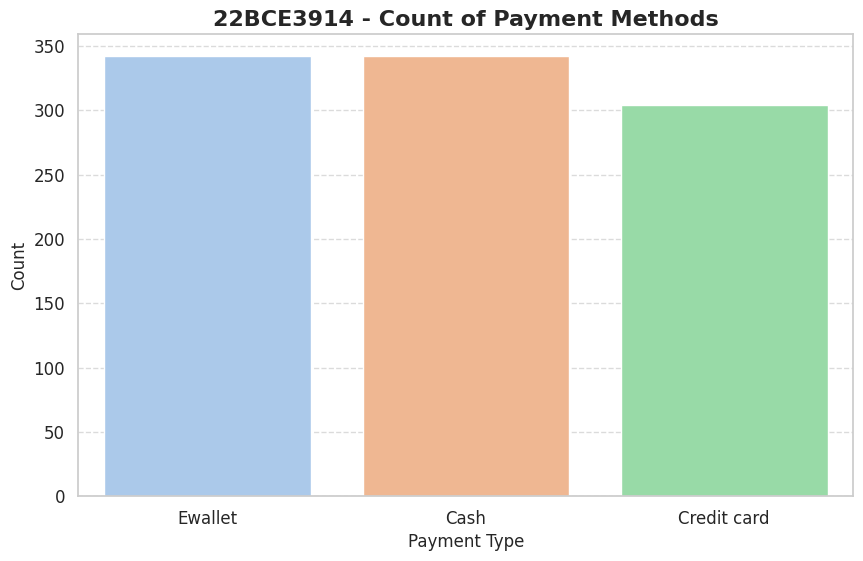

In [21]:
# Bar Plot for Payment Method
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
colors = sns.color_palette("pastel")

sns.countplot(x='Payment', data=df_filtered, palette=colors)
plt.title("22BCE3914 - Count of Payment Methods", fontsize=16, weight='bold')
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


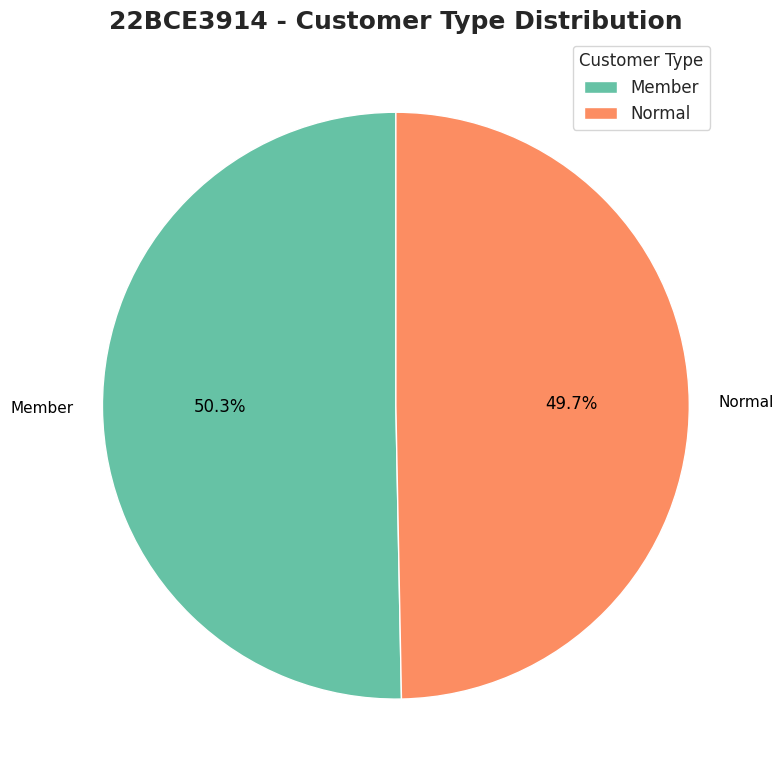

In [22]:
# Pie Plot for Customer type

customer_counts = df_filtered['Customer type'].value_counts()
plt.figure(figsize=(8, 8))
colors = ['#66c2a5', '#fc8d62']

wedges, texts, autotexts = plt.pie(
    customer_counts,
    labels=customer_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    radius=0.8
)

plt.title("22BCE3914 - Customer Type Distribution", fontsize=18, weight='bold')
plt.axis('equal')
for text in texts + autotexts:
    text.set_color('black')
plt.legend(wedges, customer_counts.index, title="Customer Type", loc="upper right", fontsize=12)
plt.tight_layout()
plt.show()


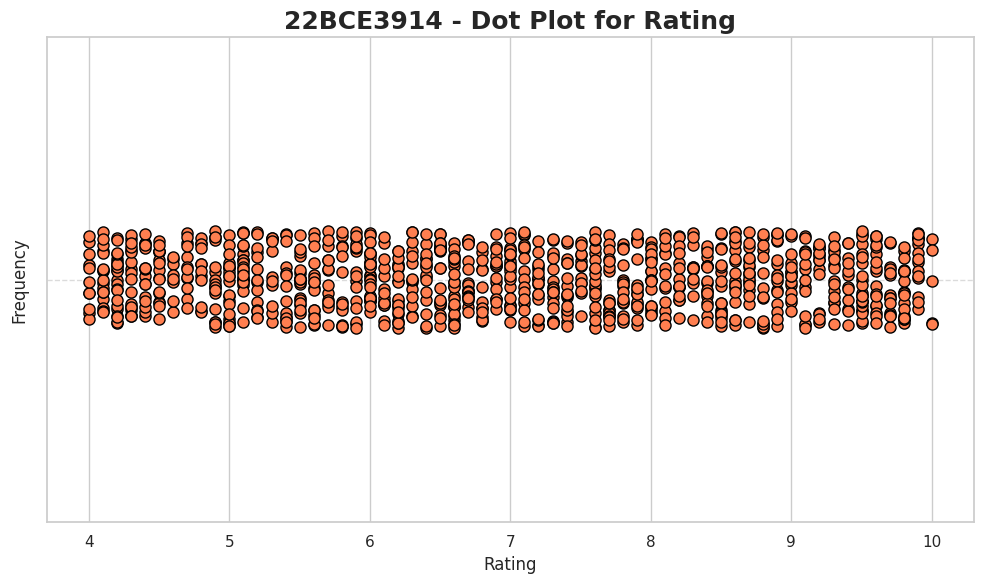

In [23]:
# Dot Plot for Rating

plt.figure(figsize=(10, 6))
sns.stripplot(x='Rating', data=df_filtered, color='#FF7F50', size=8, jitter=True, edgecolor='black', linewidth=1)
plt.title("22BCE3914 - Dot Plot for Rating", fontsize=18, weight='bold')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


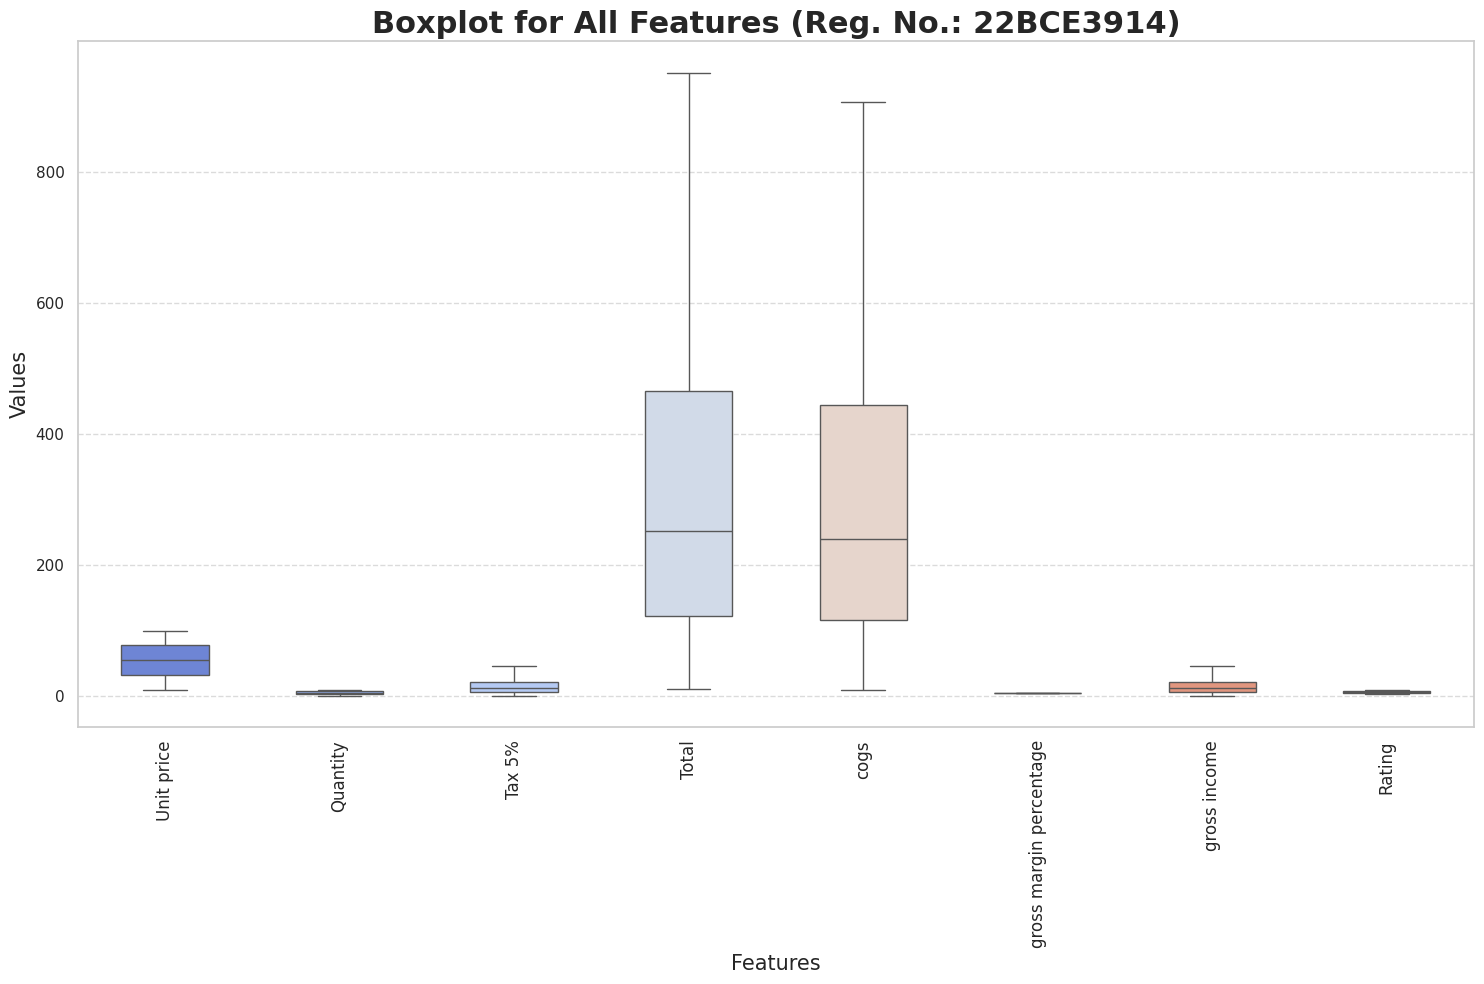

In [24]:
#Boxplot for All Features

plt.figure(figsize=(15, 10))
palette = sns.color_palette("coolwarm", n_colors=len(df_numeric.columns))
sns.boxplot(data=df_numeric, palette=palette, width=0.5)
plt.title('Boxplot for All Features (Reg. No.: 22BCE3914)', fontsize=22, weight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **ANALYSIS : Bivariate**

# **Contingency Table (Categorical vs. Binned Numeric)**


In [25]:
# Binning 'Rating' into categories
bins = [0, 4, 6, 8, 10]
labels = ['Poor', 'Average', 'Good', 'Excellent']
df['rating_category'] = pd.cut(df['Rating'], bins=bins, labels=labels, include_lowest=True)

# Contingency Table
contingency_table = pd.crosstab(df['Customer type'], df['rating_category'])
print("Contingency Table:\n", contingency_table)


Contingency Table:
 rating_category  Poor  Average  Good  Excellent
Customer type                                  
Member              7      173   164        156
Normal              4      155   187        151


# **Categorical vs Categorical**

<Figure size 1000x600 with 0 Axes>

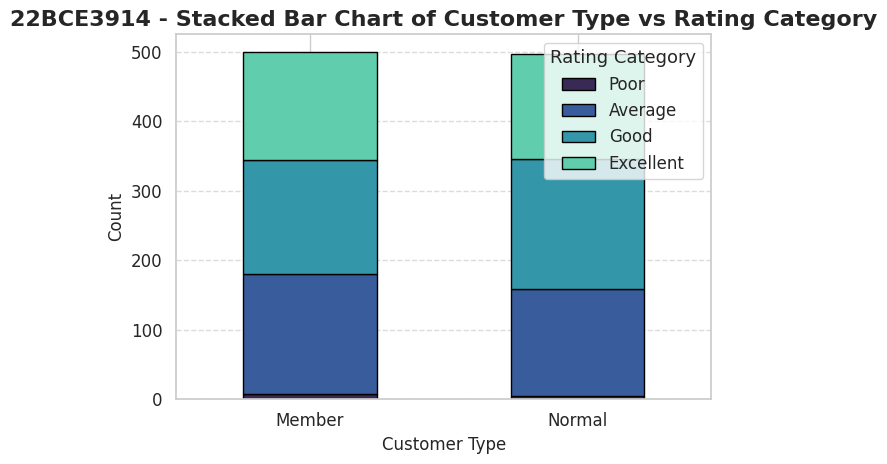

In [ ]:
#Stacked Bar Chart: Customer Type vs Rating Category

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

colors = sns.color_palette("mako", n_colors=len(contingency_table.columns))

contingency_table.plot(
    kind='bar',
    stacked=True,
    color=colors,
    edgecolor='black',
    width=0.5
)

plt.title("22BCE3914 - Stacked Bar Chart of Customer Type vs Rating Category", fontsize=16, fontweight='bold')
plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Rating Category', title_fontsize='13', fontsize='12', loc='upper right')
plt.tight_layout()
plt.show()


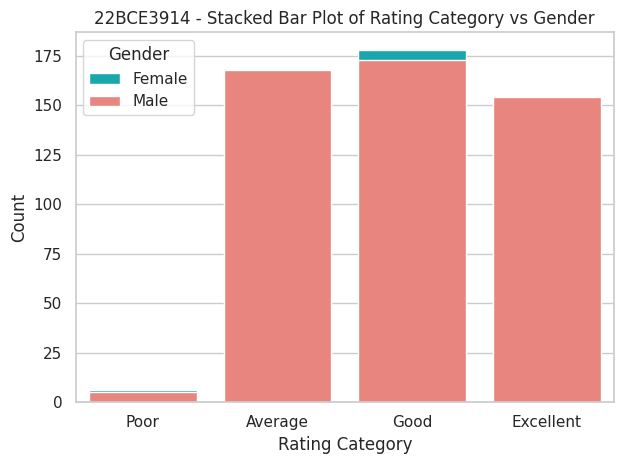

In [26]:
# Stacked Bar Plot : Rating Category vs Gender

sns.set_palette(['#00BFC4', '#F8766D'])
sns.countplot(x='rating_category', hue='Gender', data=df, dodge=False)
plt.title("22BCE3914 - Stacked Bar Plot of Rating Category vs Gender")
plt.xlabel("Rating Category")
plt.ylabel("Count")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


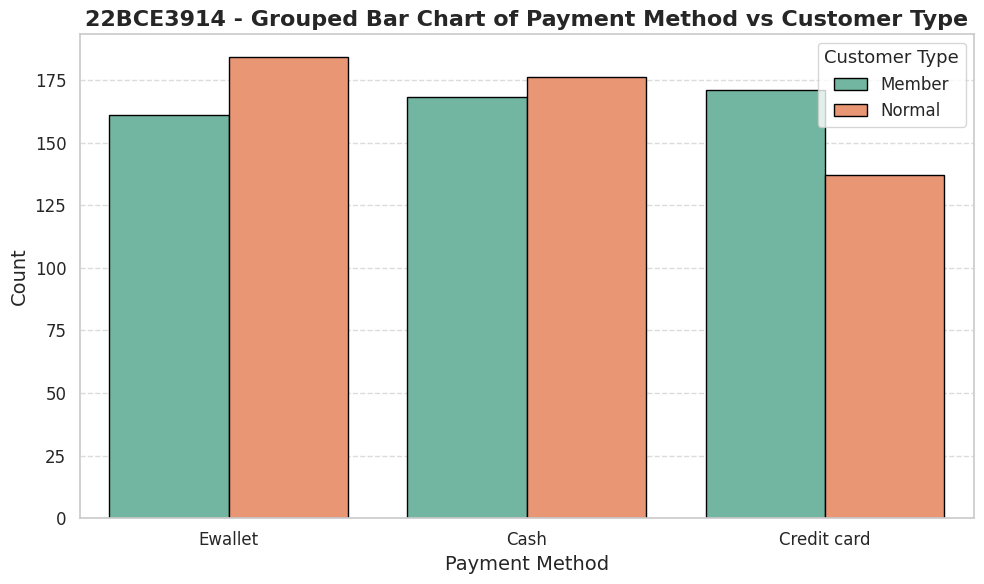

In [27]:
# Grouped Bar Plot: Payment vs Customer Type

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.countplot(data=df, x='Payment', hue='Customer type', palette='Set2', edgecolor='black')

plt.title("22BCE3914 - Grouped Bar Chart of Payment Method vs Customer Type", fontsize=16, fontweight='bold')
plt.xlabel("Payment Method", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Customer Type', title_fontsize='13', fontsize='12', loc='upper right')
plt.tight_layout()
plt.show()


# **Categorical vs Quantitative**


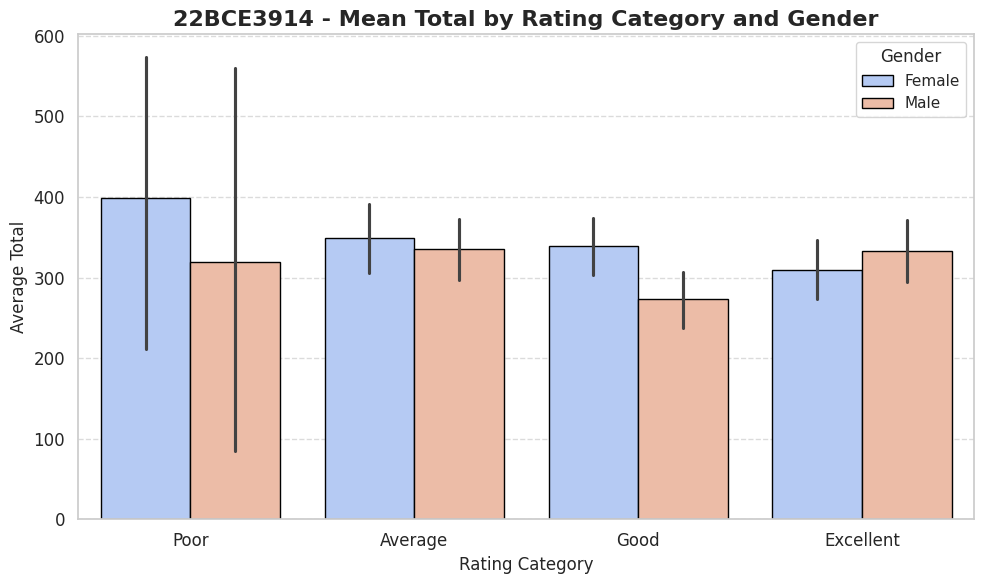

In [28]:
# Bar Chart: Average Total by Rating Category

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.barplot(data=df, x='rating_category', y='Total', hue='Gender', palette='coolwarm', edgecolor='black')

plt.title("22BCE3914 - Mean Total by Rating Category and Gender", fontsize=16, fontweight='bold')
plt.xlabel("Rating Category")
plt.ylabel("Average Total")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()



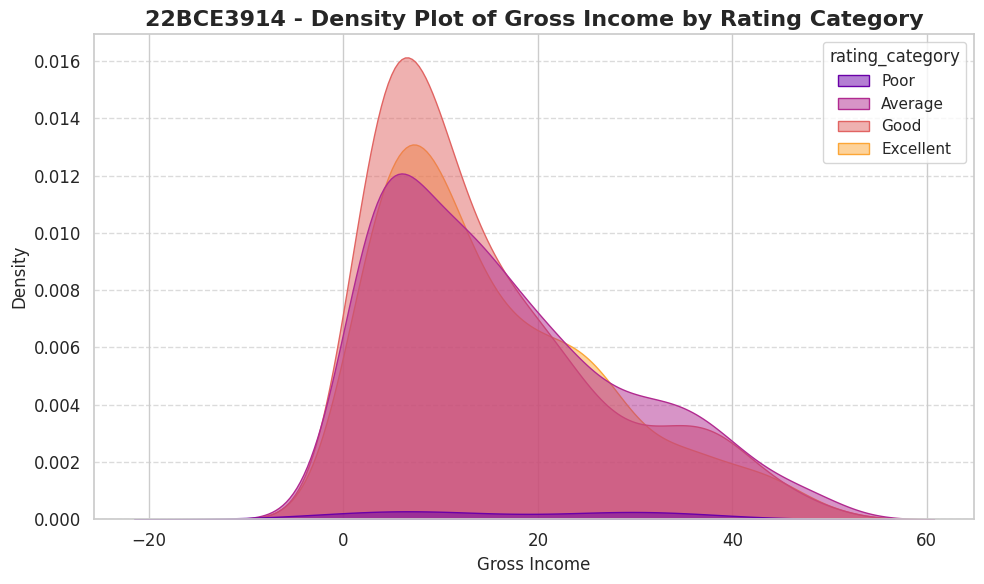

In [29]:
# Density Plot: Gross Income by Rating Category

plt.figure(figsize=(10, 6))
palette = sns.color_palette("plasma", n_colors=len(df['rating_category'].unique()))

sns.kdeplot(data=df, x='gross income', hue='rating_category', fill=True, palette=palette, alpha=0.5)

plt.title("22BCE3914 - Density Plot of Gross Income by Rating Category", fontsize=16, fontweight='bold')
plt.xlabel("Gross Income")
plt.ylabel("Density")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-30-56ba1def7623>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rating_category', y='Total', palette='pastel')


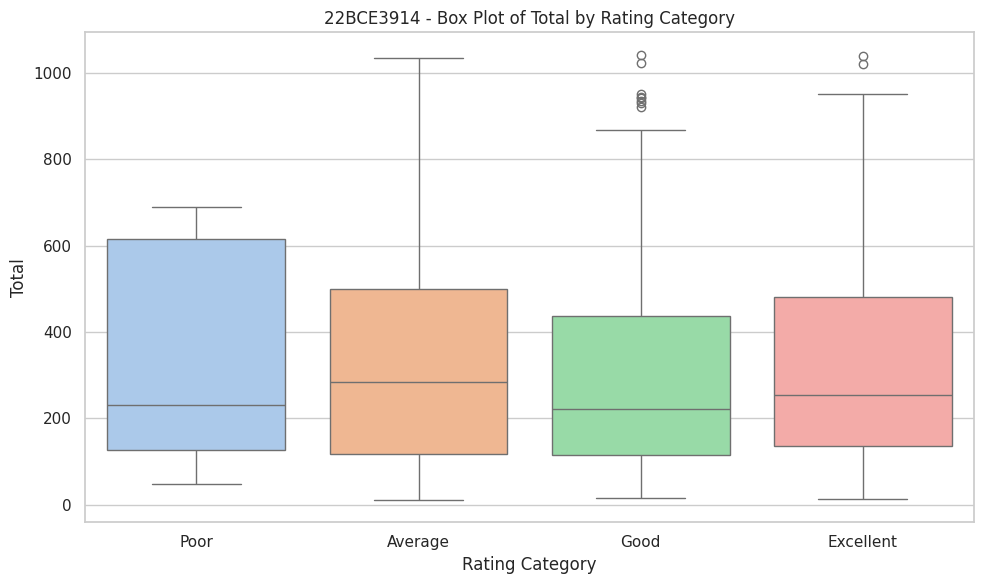

In [30]:
#Box Plot: Total by Rating Category

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='rating_category', y='Total', palette='pastel')
plt.title("22BCE3914 - Box Plot of Total by Rating Category")
plt.xlabel("Rating Category")
plt.ylabel("Total")
plt.tight_layout()
plt.show()



<ipython-input-31-5a0df81df28d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Customer type', y='gross income', palette=palette, edgecolor='black')


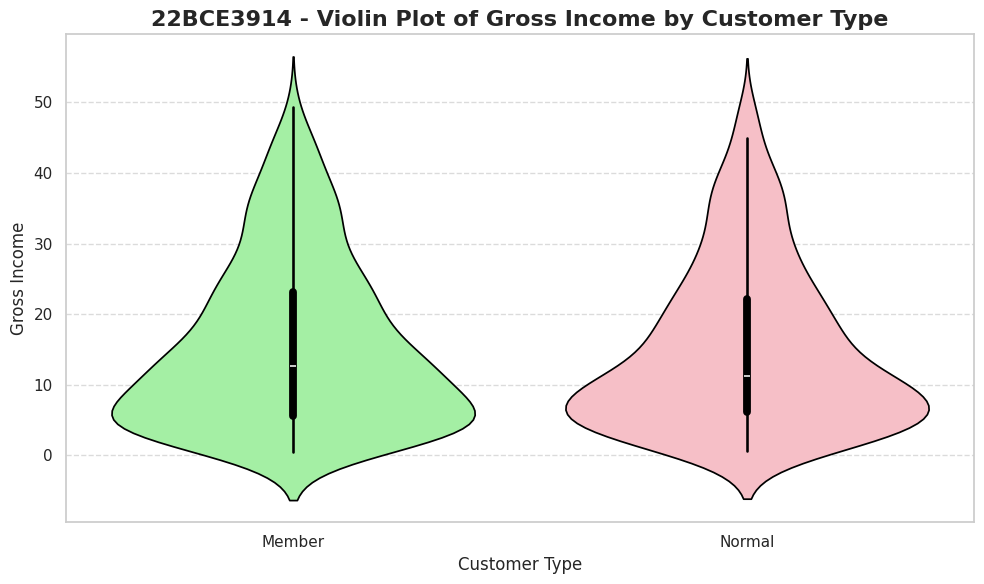

In [31]:
# Violin Plot: Gross Income by Customer Type

plt.figure(figsize=(10, 6))
palette = ['#98FB98', '#FFB6C1']

sns.violinplot(data=df, x='Customer type', y='gross income', palette=palette, edgecolor='black')

plt.title("22BCE3914 - Violin Plot of Gross Income by Customer Type", fontsize=16, fontweight='bold')
plt.xlabel("Customer Type")
plt.ylabel("Gross Income")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-32-bd603e52271c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Gender', y='Rating', palette=['#8A2BE2', '#FF69B4'], inner=None)


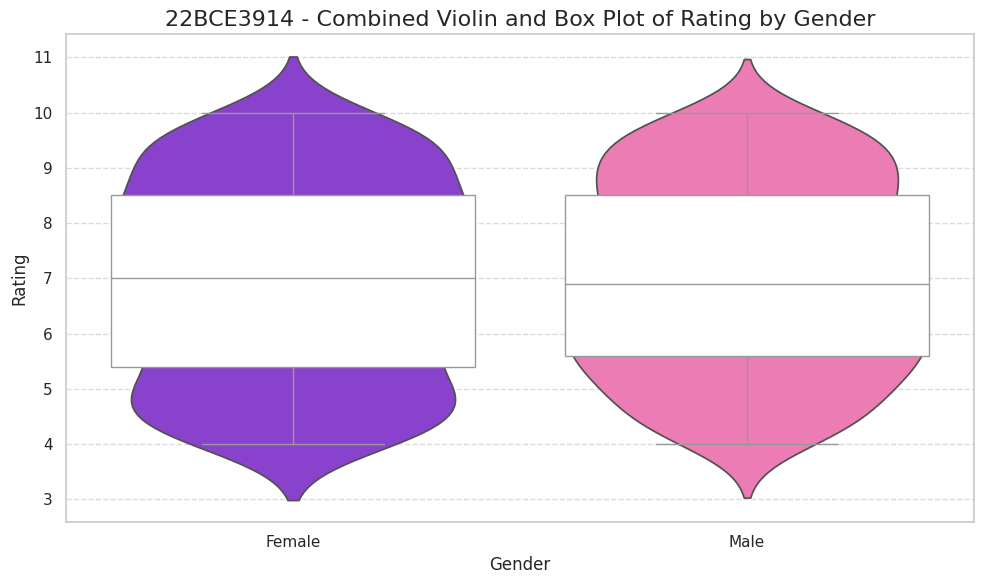

In [32]:
# Combined Violin & Box Plot: Rating by Gender

plt.figure(figsize=(10, 6))

sns.violinplot(data=df, x='Gender', y='Rating', palette=['#8A2BE2', '#FF69B4'], inner=None)
sns.boxplot(data=df, x='Gender', y='Rating', color='white', fliersize=0)

plt.title("22BCE3914 - Combined Violin and Box Plot of Rating by Gender", fontsize=16)
plt.xlabel("Gender")
plt.ylabel("Rating")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# **Quantitative vs Quantitative**


<ipython-input-33-2f5ec3e95474>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df.groupby('rating_category')['Rating'].mean().reset_index()


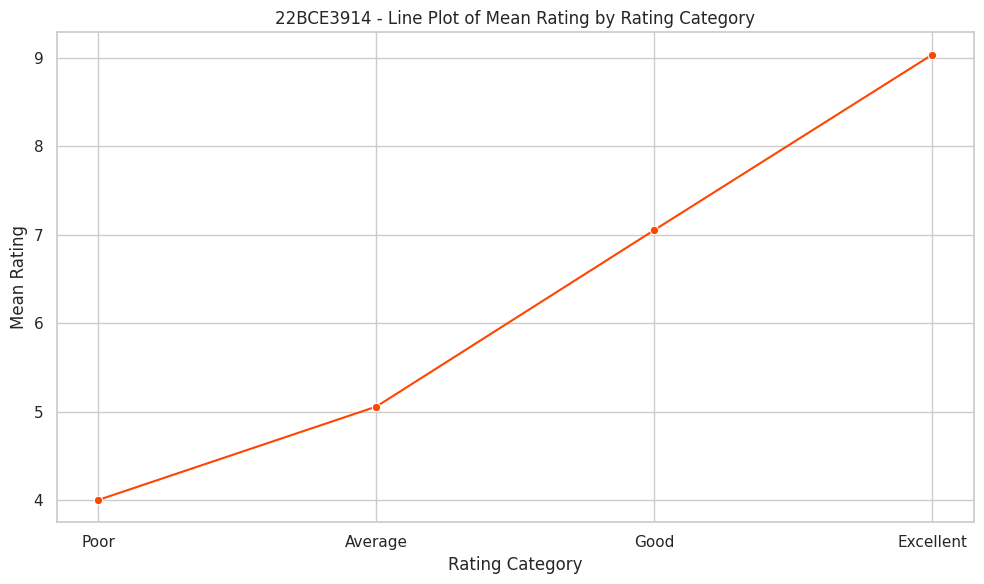

In [33]:
#  Line Plot: Mean Rating by Rating Category
mean_values = df.groupby('rating_category')['Rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_values, x='rating_category', y='Rating', marker='o', color='#FF4500')

plt.title("22BCE3914 - Line Plot of Mean Rating by Rating Category")
plt.xlabel("Rating Category")
plt.ylabel("Mean Rating")
plt.tight_layout()
plt.show()



In [34]:
print(df.isnull().sum())  # Shows the count of missing values per column


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
rating_category            0
dtype: int64


[4.76190476]


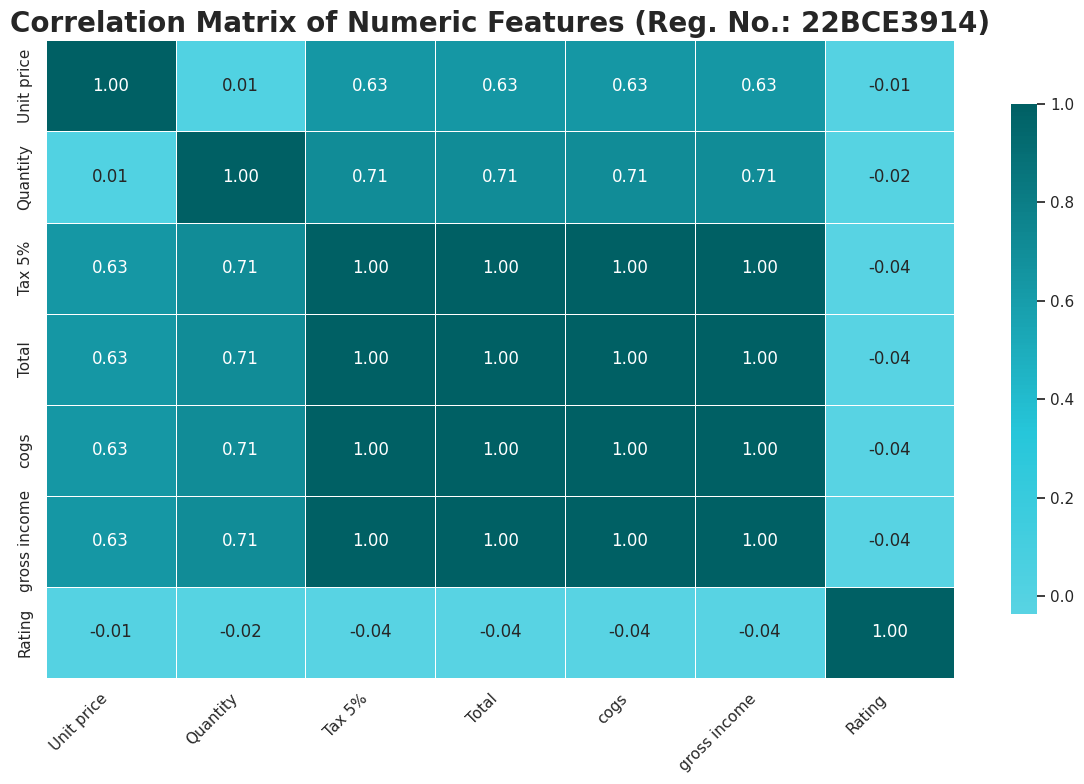

In [35]:
print(df['gross margin percentage'].unique())

#since the  gross margin percentage column has only one unique value that means the column as varience = 0 so dropping the column gross margin percentage for correlation

#Correlation Heatmap

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

df_cleaned = df.drop(columns=['gross margin percentage'])

df_numeric = df_cleaned.select_dtypes(include=['float64', 'int64'])

corr = df_numeric.corr()

colors = ["#e0f7fa", "#80deea", "#26c6da", "#006064"]
cmap = LinearSegmentedColormap.from_list("teal_blue", colors, N=256)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, center=0, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numeric Features (Reg. No.: 22BCE3914)', fontsize=20, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

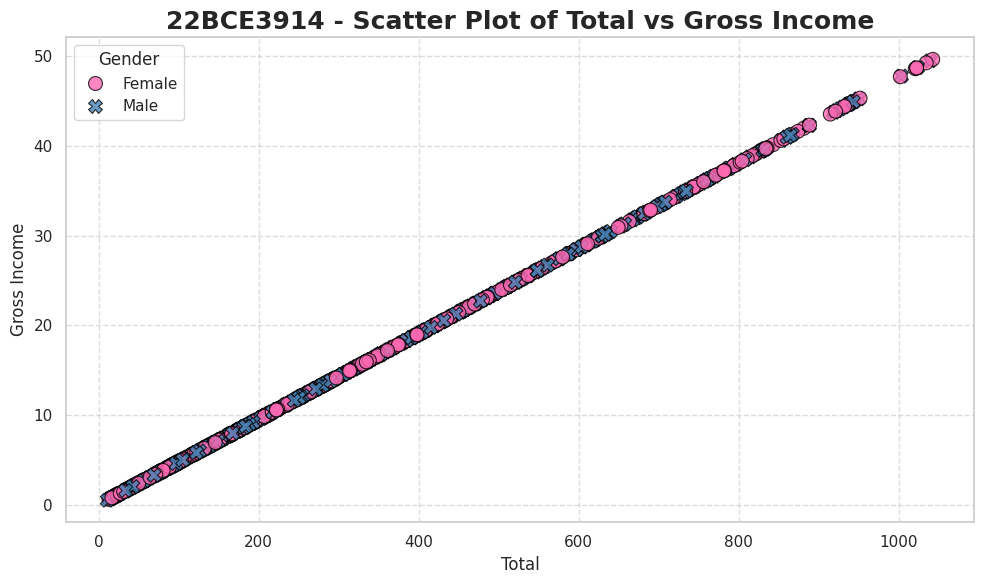

In [36]:
# Scatter Plot: Total vs Gross Income

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total', y='gross income', hue='Gender', style='Gender',
                palette=['#FF69B4', '#4682B4'], s=100, edgecolor='black', alpha=0.8)

plt.title("22BCE3914 - Scatter Plot of Total vs Gross Income", fontsize=18, weight='bold')
plt.xlabel("Total")
plt.ylabel("Gross Income")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


# **Multivariate Analysis**

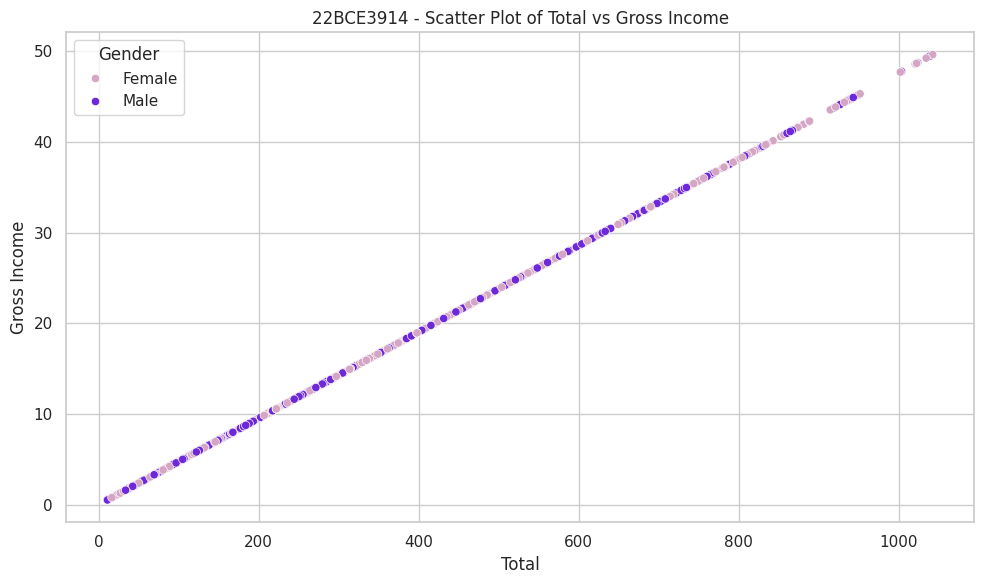

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
# Scatter Plot with Color as a Third Variable

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total', y='gross income', hue='Gender', palette=["#D5A6C4", "#6D28D9"])
plt.title("22BCE3914 - Scatter Plot of Total vs Gross Income")
plt.xlabel("Total")
plt.ylabel("Gross Income")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


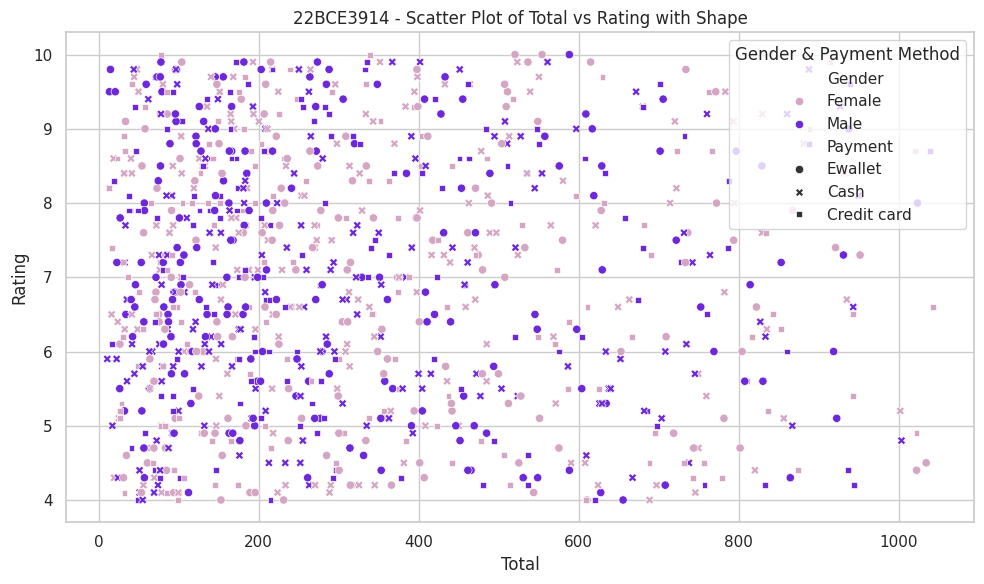

In [38]:
# Scatter Plot with Color and Shape as Variables

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total', y='Rating', hue='Gender', style='Payment', palette=["#D5A6C4", "#6D28D9"])
plt.title("22BCE3914 - Scatter Plot of Total vs Rating with Shape")
plt.xlabel("Total")
plt.ylabel("Rating")
plt.legend(title='Gender & Payment Method')
plt.tight_layout()
plt.show()

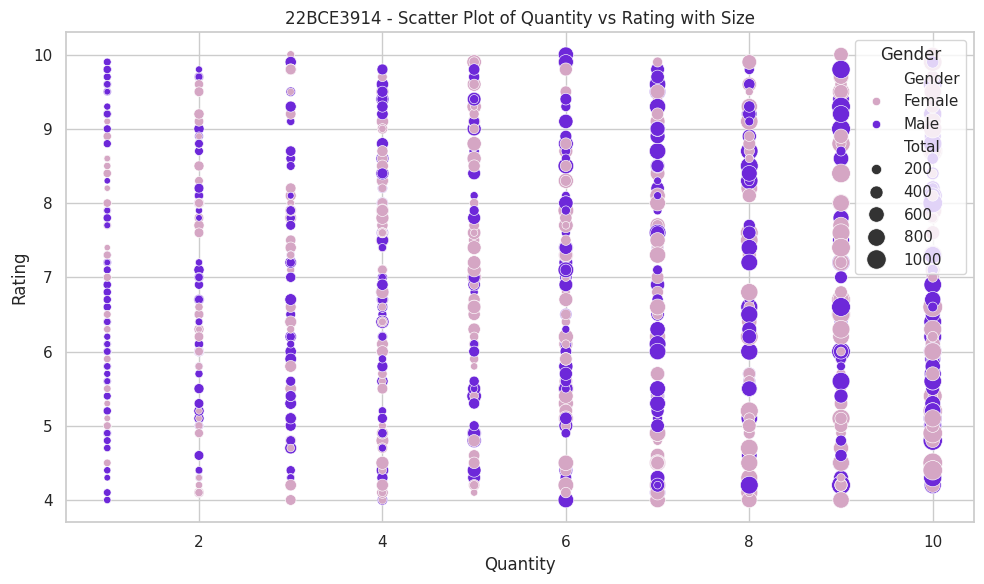

In [39]:
# Scatter Plot with Color and Size as Variables

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Quantity', y='Rating', hue='Gender', size='Total', sizes=(20, 200), palette=["#D5A6C4", "#6D28D9"])
plt.title("22BCE3914 - Scatter Plot of Quantity vs Rating with Size")
plt.xlabel("Quantity")
plt.ylabel("Rating")
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

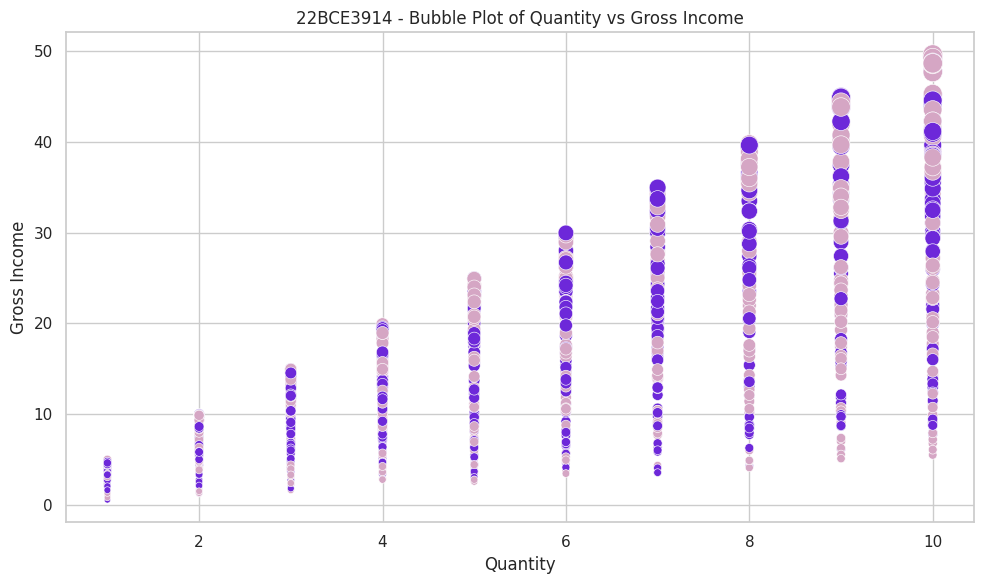

In [40]:
# Bubble Plot

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Quantity', y='gross income', hue='Gender', size='Total', sizes=(20, 200), palette=["#D5A6C4", "#6D28D9"], legend=False)
plt.title("22BCE3914 - Bubble Plot of Quantity vs Gross Income")
plt.xlabel("Quantity")
plt.ylabel("Gross Income")
plt.tight_layout()
plt.show()

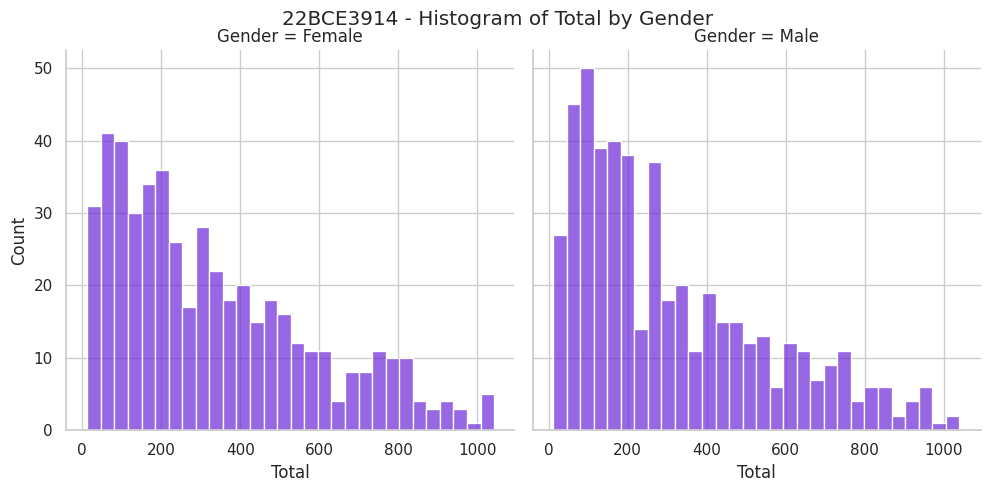

In [41]:
# Faceted Histogram
g = sns.FacetGrid(df, col='Gender', height=5, aspect=1)
g.map(sns.histplot, 'Total', bins=30, color='#6D28D9', alpha=0.7)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("22BCE3914 - Histogram of Total by Gender")
plt.show()

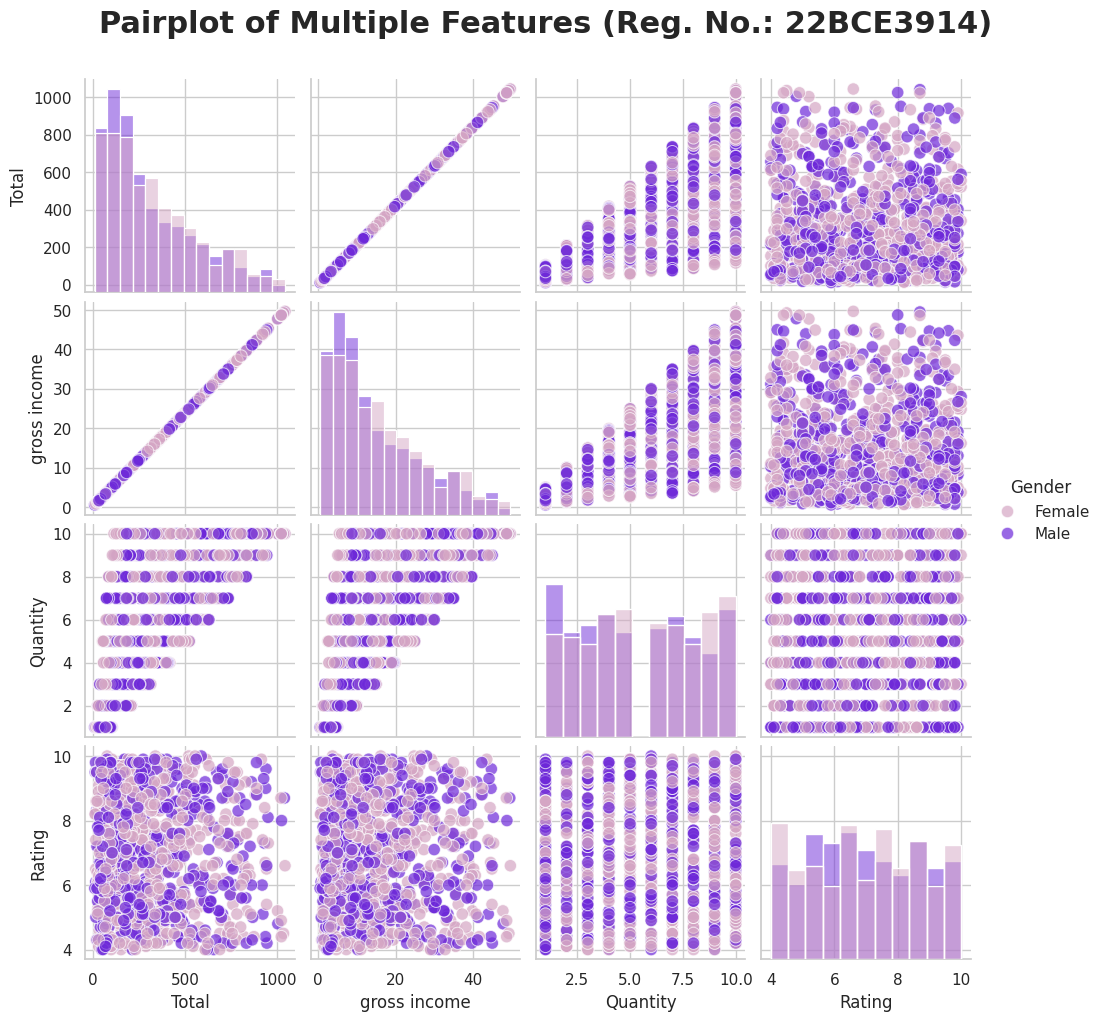

In [42]:
# Pairplot
features_of_interest = ['Total', 'gross income', 'Quantity', 'Rating']
df_relevant = df[features_of_interest + ['Gender']]

pairplot = sns.pairplot(
    df_relevant,
    hue='Gender',
    palette=["#D5A6C4", "#6D28D9"],
    diag_kind='hist',
    plot_kws={'alpha': 0.7, 'edgecolor': 'w', 's': 80},
)

pairplot.fig.suptitle('Pairplot of Multiple Features (Reg. No.: 22BCE3914)', fontsize=22, weight='bold', y=1.02)
pairplot.fig.subplots_adjust(top=0.95)
plt.show()


# **Module 2**

In [44]:
# merging DATA

# Average rating by city
avg_rating_by_city = df_filtered.groupby('City')[['Rating']].mean().reset_index()
avg_rating_by_city.columns = ['City', 'Avg City Rating']

# Merge it back to main dataframe
df_merged = pd.merge(df_filtered, avg_rating_by_city, on='City')

# Display the merged dataframe
print(df_merged[['City', 'Rating', 'Avg City Rating']].head())




        City  Rating  Avg City Rating
0     Yangon     9.1         7.021365
1  Naypyitaw     9.6         7.090966
2     Yangon     7.4         7.021365
3     Yangon     8.4         7.021365
4     Yangon     5.3         7.021365


In [45]:
#Reshaping with hierarchial indexing

# hierarchical index
df_filtered.set_index(['City', 'Payment'], inplace=True)
print(df_filtered.head())

# Resetting the index
df_filtered.reset_index(inplace=True)


                        Invoice ID Branch Customer type  Gender  \
City      Payment                                                 
Yangon    Ewallet      750-67-8428      A        Member  Female   
Naypyitaw Cash         226-31-3081      C        Normal  Female   
Yangon    Credit card  631-41-3108      A        Normal    Male   
          Ewallet      123-19-1176      A        Member    Male   
          Ewallet      373-73-7910      A        Normal    Male   

                                 Product line  Unit price  Quantity   Tax 5%  \
City      Payment                                                              
Yangon    Ewallet           Health and beauty       74.69         7  26.1415   
Naypyitaw Cash         Electronic accessories       15.28         5   3.8200   
Yangon    Credit card      Home and lifestyle       46.33         7  16.2155   
          Ewallet           Health and beauty       58.22         8  23.2880   
          Ewallet           Sports and travel     

<ipython-input-47-fe52acb5d047>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['log_Total'] = np.log(df_filtered['Total'] + 1)


      Total  log_Total
0  548.9715   6.309866
1   80.2200   4.397162
2  340.5255   5.833422
3  489.0480   6.194503
4  634.3785   6.454221


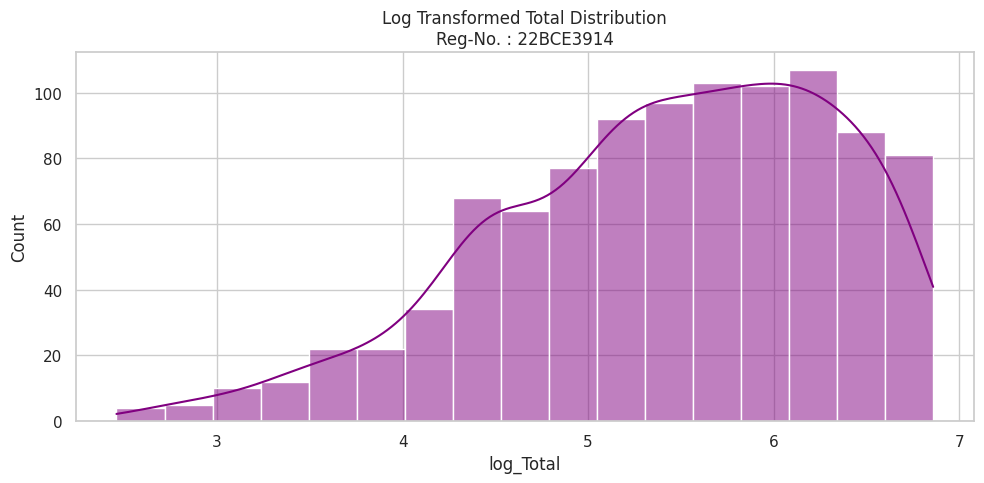

In [47]:
# Apply log transformation to reduce skewness
df_filtered['log_Total'] = np.log(df_filtered['Total'] + 1)

# Compare original vs transformed
print(df_filtered[['Total', 'log_Total']].head())

# isualize distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered['log_Total'], kde=True, color='purple')
plt.title('Log Transformed Total Distribution\nReg-No. : 22BCE3914')
plt.xlabel('log_Total')
plt.tight_layout()
plt.show()


<ipython-input-48-73729479d2c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Total_Spend_Category'] = pd.cut(df_filtered['Total'], bins=bins, labels=labels)
<ipython-input-48-73729479d2c3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_filtered, x='Total_Spend_Category', palette='coolwarm')


      Total Total_Spend_Category
0  548.9715                 High
1   80.2200                  Low
2  340.5255               Medium
3  489.0480                 High
4  634.3785            Very High


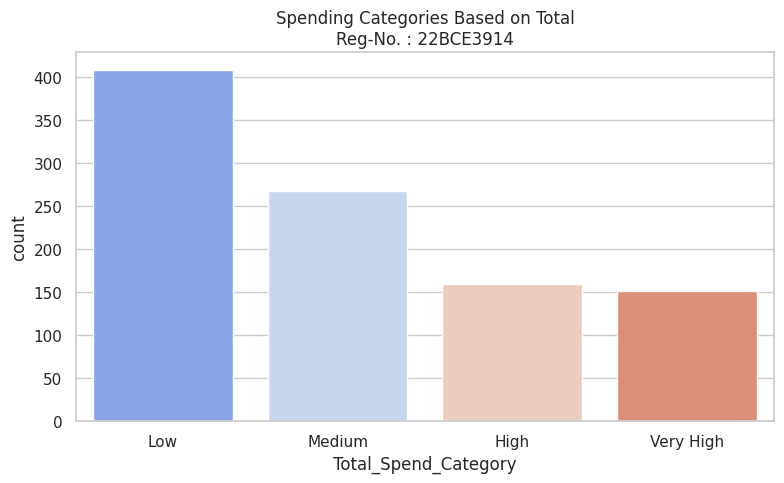

In [48]:
#Discretization and Binning
# Define bins
bins = [0, 200, 400, 600, df_filtered['Total'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
df_filtered['Total_Spend_Category'] = pd.cut(df_filtered['Total'], bins=bins, labels=labels)

# View some entries
print(df_filtered[['Total', 'Total_Spend_Category']].head())

# Visualize
plt.figure(figsize=(8, 5))
sns.countplot(data=df_filtered, x='Total_Spend_Category', palette='coolwarm')
plt.title('Spending Categories Based on Total\nReg-No. : 22BCE3914')
plt.tight_layout()
plt.show()


## TIME SERIES ANALYSIS

In [50]:
# Convert 'Date' column to datetime format
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Sort the dataframe by date (important for time series)
df_filtered = df_filtered.sort_values(by='Date')

# Set 'Date' as the index
df_filtered.set_index('Date', inplace=True)

<ipython-input-50-a0bf241052f9>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
<ipython-input-50-a0bf241052f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])


In [51]:
# Check for missing values
missing_values = df_filtered.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 City                       0
Payment                    0
Invoice ID                 0
Branch                     0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
log_Total                  0
Total_Spend_Category       0
dtype: int64


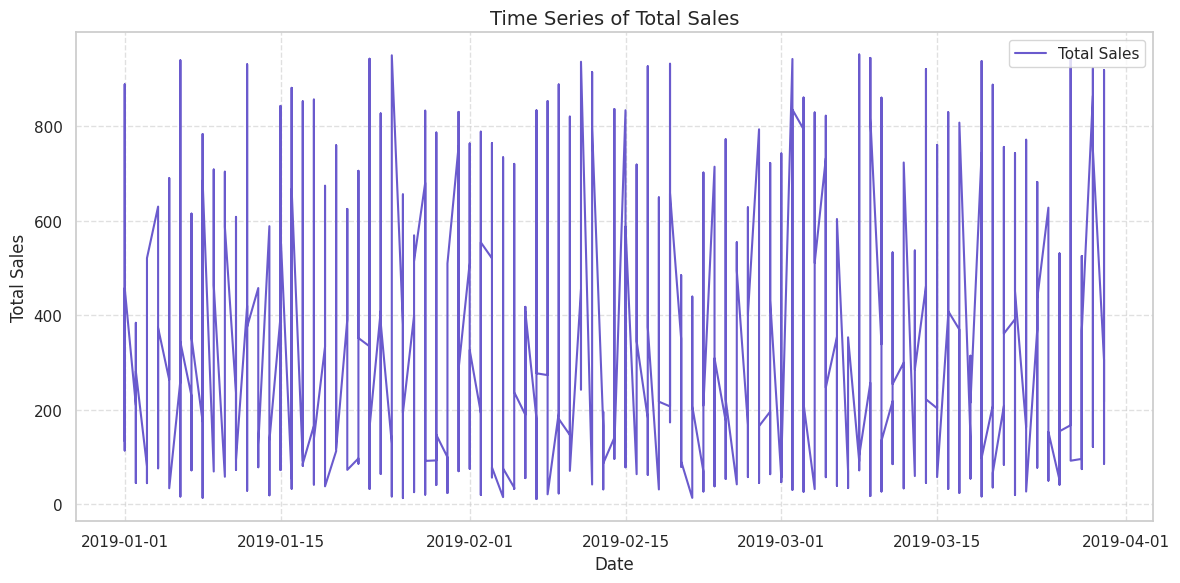

In [52]:
 #Plotting the Time Series of Total Sales

 import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['Total'], color='#6A5ACD', label='Total Sales')
plt.title("Time Series of Total Sales", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


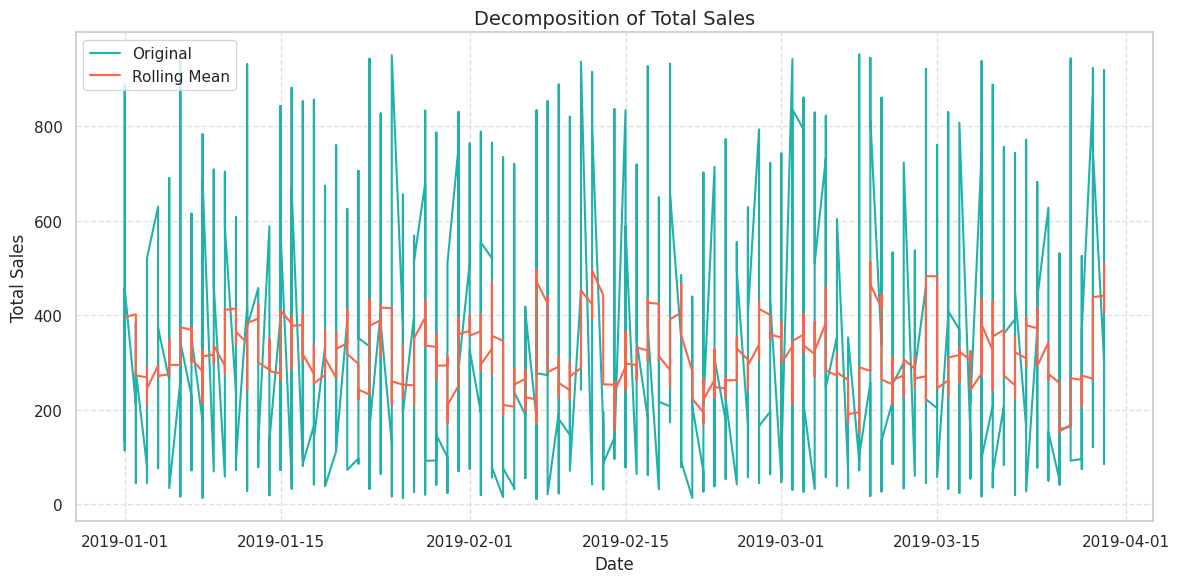

In [53]:
# Decomposition using Rolling Mean

# Compute 12-period rolling mean
df_filtered['rolling_mean'] = df_filtered['Total'].rolling(window=12).mean()

# Plot both original and rolling mean
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['Total'], label='Original', color='#20B2AA')        # Light Sea Green
plt.plot(df_filtered.index, df_filtered['rolling_mean'], label='Rolling Mean', color='#FF6347')  # Tomato
plt.title("Decomposition of Total Sales", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


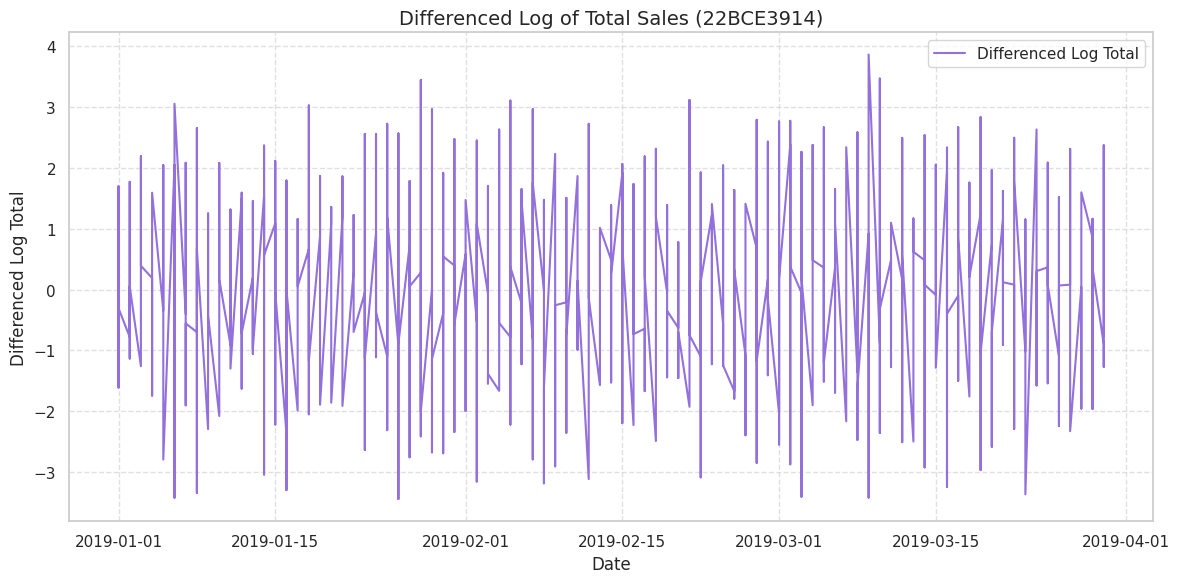

In [54]:
#Make the Dataset Stationary (Log + Differencing)

import numpy as np

# Apply log transformation
df_filtered['log_total'] = np.log(df_filtered['Total'])

# Differencing to remove trend
df_filtered['diff_log_total'] = df_filtered['log_total'].diff()

# Plot the differenced log-transformed series
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index, df_filtered['diff_log_total'], label='Differenced Log Total', color='#9370DB')  # Medium Purple
plt.title("Differenced Log of Total Sales (22BCE3914)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Differenced Log Total")
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




# **MODULE 4**

# **1D ANALYSIS**


In [57]:
# Measure of Central Tendancy

# Measures of Central Tendency for relevant numeric columns
central_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'gross income', 'Rating']

# Mean
mean_vals = df_filtered[central_cols].mean()
print("Mean Values:\n", mean_vals)

# Median
median_vals = df_filtered[central_cols].median()
print("\nMedian Values:\n", median_vals)

# Quantiles
quantiles = df_filtered[central_cols].quantile([0.25, 0.5, 0.75])
print("\nQuantiles (25%, 50%, 75%):\n", quantiles)


Mean Values:
 Unit price       55.298715
Quantity          5.469636
Tax 5%           15.086761
Total           316.821984
gross income     15.086761
Rating            6.980466
dtype: float64

Median Values:
 Unit price       54.785
Quantity          5.000
Tax 5%           12.024
Total           252.504
gross income     12.024
Rating            7.000
dtype: float64

Quantiles (25%, 50%, 75%):
       Unit price  Quantity    Tax 5%      Total  gross income  Rating
0.25     32.6875       3.0   5.79975  121.79475       5.79975     5.5
0.50     54.7850       5.0  12.02400  252.50400      12.02400     7.0
0.75     77.5150       8.0  22.21125  466.43625      22.21125     8.5


In [58]:
#Measures of Dispersion

from scipy.stats import iqr

# 1. Range
range_vals = df_filtered[central_cols].max() - df_filtered[central_cols].min()
print("\nRange Values:\n", range_vals)

# 2. Interquartile Range (IQR)
iqr_vals = df_filtered[central_cols].apply(iqr)
print("\nInterquartile Range (IQR):\n", iqr_vals)

# 3. Standard Deviation
std_vals = df_filtered[central_cols].std()
print("\nStandard Deviation:\n", std_vals)

# 4. Skewness
skew_vals = df_filtered[central_cols].skew()
print("\nSkewness:\n", skew_vals)

# 5. Kurtosis
kurt_vals = df_filtered[central_cols].kurt()
print("\nKurtosis:\n", kurt_vals)



Range Values:
 Unit price       89.8800
Quantity          9.0000
Tax 5%           44.8165
Total           941.1465
gross income     44.8165
Rating            6.0000
dtype: float64

Interquartile Range (IQR):
 Unit price       44.8275
Quantity          5.0000
Tax 5%           16.4115
Total           344.6415
gross income     16.4115
Rating            3.0000
dtype: float64

Standard Deviation:
 Unit price       26.334971
Quantity          2.903390
Tax 5%           11.332933
Total           237.991600
gross income     11.332933
Rating            1.717221
dtype: float64

Skewness:
 Unit price      0.014039
Quantity        0.019555
Tax 5%          0.841295
Total           0.841295
gross income    0.841295
Rating          0.003093
dtype: float64

Kurtosis:
 Unit price     -1.212419
Quantity       -1.203704
Tax 5%         -0.240535
Total          -0.240535
gross income   -0.240535
Rating         -1.144153
dtype: float64


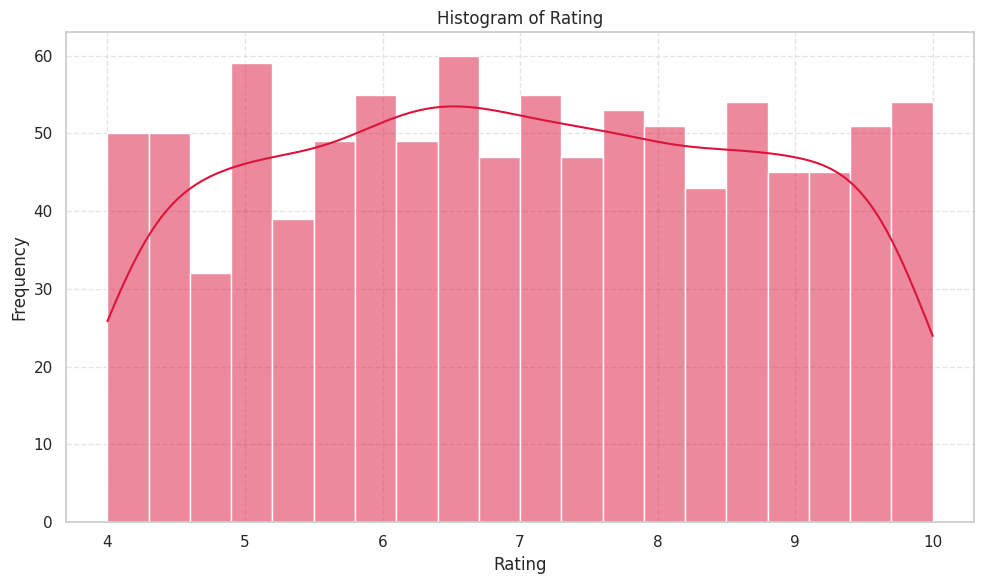

In [59]:
# Frequency Distribution

#Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['Rating'], bins=20, kde=True, color='crimson')
plt.title("Histogram of Rating")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-60-d7c1af79fe5d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rel_freq.index, y=rel_freq.values, palette='mako')


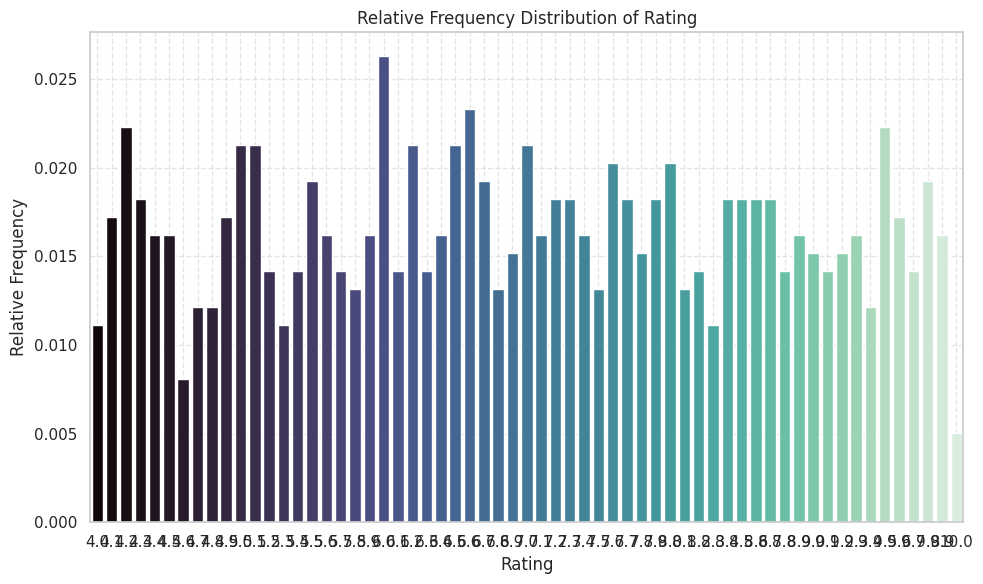

In [60]:
#Relative Frequency Distribution



rel_freq = df_filtered['Rating'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=rel_freq.index, y=rel_freq.values, palette='mako')
plt.title("Relative Frequency Distribution of Rating")
plt.xlabel("Rating")
plt.ylabel("Relative Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


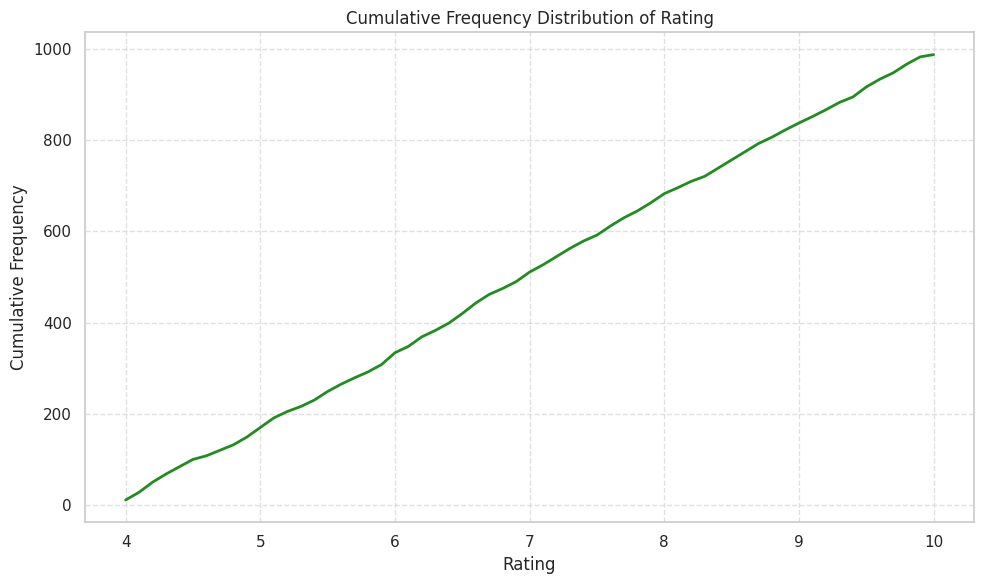

In [61]:
#  Cumulative Frequency Distribution

cum_freq = df_filtered['Rating'].value_counts().sort_index().cumsum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=cum_freq.index, y=cum_freq.values, color='forestgreen', linewidth=2)
plt.title("Cumulative Frequency Distribution of Rating")
plt.xlabel("Rating")
plt.ylabel("Cumulative Frequency")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [62]:
# Categorical Variable Analysis

df_filtered['spending_category'] = pd.cut(df_filtered['Total'],
                                          bins=[0, 200, 400, 600, 800, 1000],
                                          labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

print(df_filtered[['Total', 'spending_category']].head())


              Total spending_category
Date                                 
2019-01-01  132.762          Very Low
2019-01-01  399.756               Low
2019-01-01  888.615         Very High
2019-01-01  177.408          Very Low
2019-01-01  184.086          Very Low


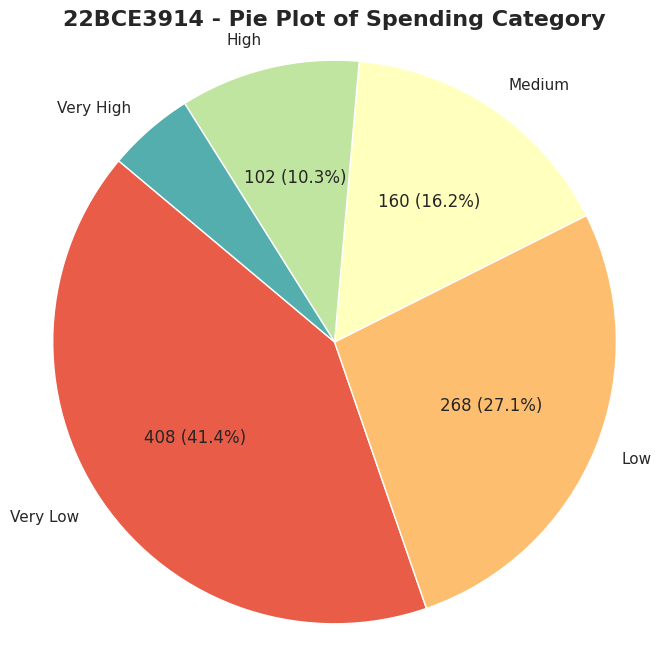

In [63]:
# Pie Plot for Spending Category

sizes = df_filtered['spending_category'].value_counts()
colors = sns.color_palette("Spectral", len(sizes))

def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return f'{absolute} ({pct:.1f}%)' if pct > 5 else ''

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=sizes.index, autopct=lambda pct: func(pct, sizes), startangle=140, colors=colors)
plt.title("22BCE3914 - Pie Plot of Spending Category", fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()



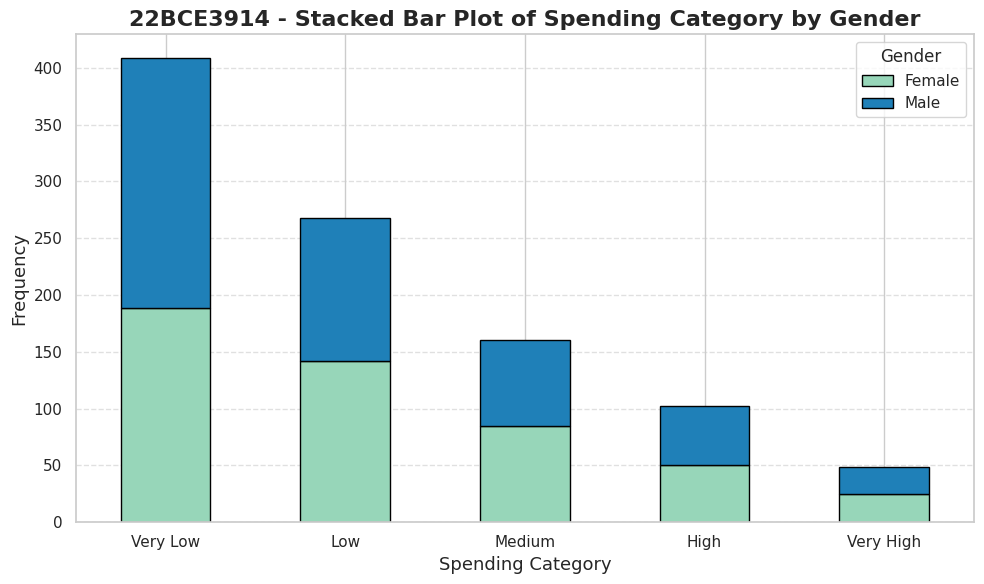

In [64]:
# Stacked Bar Plot: Spending Category by Gender

pivot = df_filtered.groupby(['spending_category', 'Gender'], observed=True).size().unstack()

plt.figure(figsize=(10, 6))
colors = sns.color_palette("YlGnBu", len(pivot.columns))
pivot.plot(kind='bar', stacked=True, color=colors, edgecolor='black', ax=plt.gca())

plt.title("22BCE3914 - Stacked Bar Plot of Spending Category by Gender", fontsize=16, fontweight='bold')
plt.xlabel("Spending Category", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Gender", frameon=True)
plt.tight_layout()
plt.show()


# **2D Analysis**

In [66]:
# Two-Way Contingency Tables

import pandas as pd

# Categorical-Categorical
cat_cat = pd.crosstab(df['Gender'], df['Customer type'])
print("Categorical-Categorical Contingency Table:\n", cat_cat)

# Numerical-Numerical (binned)
num_num = pd.crosstab(pd.cut(df['Total'], bins=3), pd.cut(df['gross income'], bins=3))
print("\nNumerical-Numerical Contingency Table:\n", num_num)

# Categorical-Numerical (binned)
cat_num = pd.crosstab(df['Payment'], pd.cut(df['Total'], bins=3))
print("\nCategorical-Numerical Contingency Table:\n", cat_num)



Categorical-Categorical Contingency Table:
 Customer type  Member  Normal
Gender                       
Female            259     238
Male              241     259

Numerical-Numerical Contingency Table:
 gross income       (0.459, 16.889]  (16.889, 33.27]  (33.27, 49.65]
Total                                                              
(9.647, 354.669]               633                0               0
(354.669, 698.66]                0              255               0
(698.66, 1042.65]                0                0             109

Categorical-Numerical Contingency Table:
 Total        (9.647, 354.669]  (354.669, 698.66]  (698.66, 1042.65]
Payment                                                            
Cash                      218                 88                 38
Credit card               197                 76                 35
Ewallet                   218                 91                 36


In [67]:
# Three-Way Contingency Table

three_way = pd.crosstab(
    [df['Gender'], pd.cut(df['Total'], bins=3)],
    pd.cut(df['gross income'], bins=3)
)
print("\n3-Way Contingency Table:\n", three_way)



3-Way Contingency Table:
 gross income              (0.459, 16.889]  (16.889, 33.27]  (33.27, 49.65]
Gender Total                                                              
Female (9.647, 354.669]               305                0               0
       (354.669, 698.66]                0              133               0
       (698.66, 1042.65]                0                0              59
Male   (9.647, 354.669]               328                0               0
       (354.669, 698.66]                0              122               0
       (698.66, 1042.65]                0                0              50


In [69]:
# Row/Column Profile, Relative Frequency & Chi-Square

import scipy.stats as stats

# Row Profile
row_profile = three_way.div(three_way.sum(axis=1), axis=0)
print("\nRow Profile:\n", row_profile)

# Column Profile
col_profile = three_way.div(three_way.sum(axis=0), axis=1)
print("\nColumn Profile:\n", col_profile)

# Relative Frequency
rel_freq = three_way / three_way.sum().sum()
print("\nRelative Frequency:\n", rel_freq)

# Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(three_way)
print(f"\nChi-Square Test:\nChi2 Statistic = {chi2}, p-value = {p}")



Row Profile:
 gross income              (0.459, 16.889]  (16.889, 33.27]  (33.27, 49.65]
Gender Total                                                              
Female (9.647, 354.669]               1.0              0.0             0.0
       (354.669, 698.66]              0.0              1.0             0.0
       (698.66, 1042.65]              0.0              0.0             1.0
Male   (9.647, 354.669]               1.0              0.0             0.0
       (354.669, 698.66]              0.0              1.0             0.0
       (698.66, 1042.65]              0.0              0.0             1.0

Column Profile:
 gross income              (0.459, 16.889]  (16.889, 33.27]  (33.27, 49.65]
Gender Total                                                              
Female (9.647, 354.669]          0.481833         0.000000        0.000000
       (354.669, 698.66]         0.000000         0.521569        0.000000
       (698.66, 1042.65]         0.000000         0.000000        0

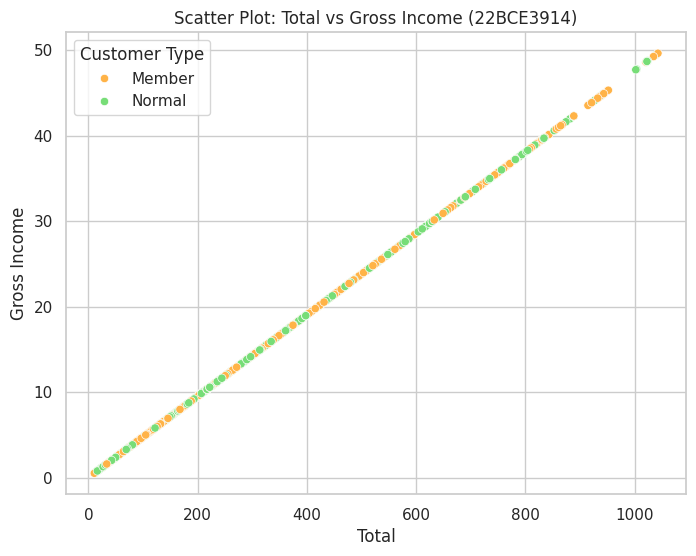

In [72]:
#Scatter Plot (Total vs Gross Income)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Total', y='gross income', hue='Customer type', palette=['#FFB347', '#77DD77'])
plt.title("Scatter Plot: Total vs Gross Income (22BCE3914)")
plt.xlabel("Total")
plt.ylabel("Gross Income")
plt.legend(title='Customer Type')
plt.show()


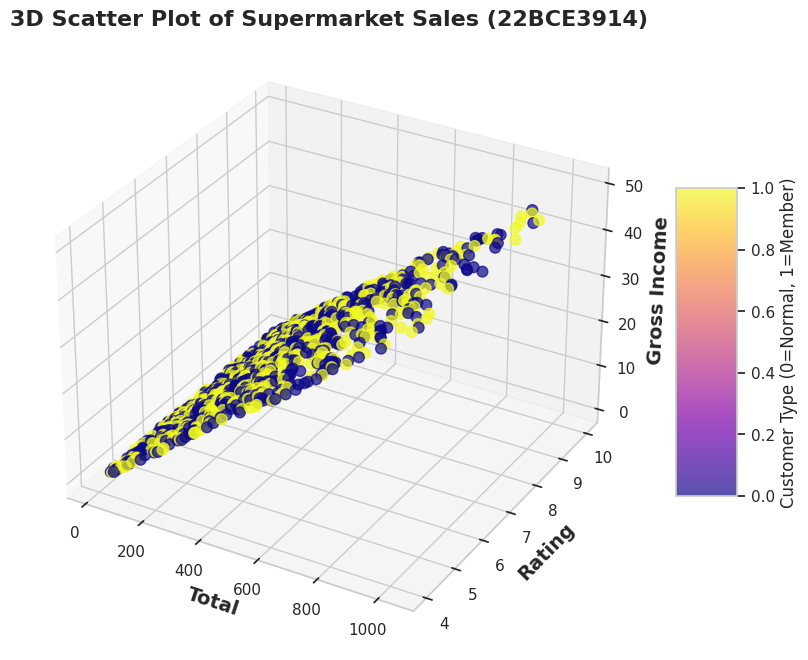

In [73]:
# 3D Scatter Plot (Total, Rating, Gross Income)

from mpl_toolkits.mplot3d import Axes3D

df['Customer type'] = df['Customer type'].astype('category')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df['Total'],
    df['Rating'],
    df['gross income'],
    c=df['Customer type'].cat.codes,
    s=60,
    cmap='plasma',
    alpha=0.7
)
ax.set_xlabel('Total', fontsize=14, fontweight='bold')
ax.set_ylabel('Rating', fontsize=14, fontweight='bold')
ax.set_zlabel('Gross Income', fontsize=14, fontweight='bold')
ax.set_title('3D Scatter Plot of Supermarket Sales (22BCE3914)', fontsize=16, fontweight='bold')
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Customer Type (0=Normal, 1=Member)', fontsize=12)
plt.show()


<ipython-input-78-0e4aa3af467f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Payment', y='Total', data=df, palette='coolwarm')


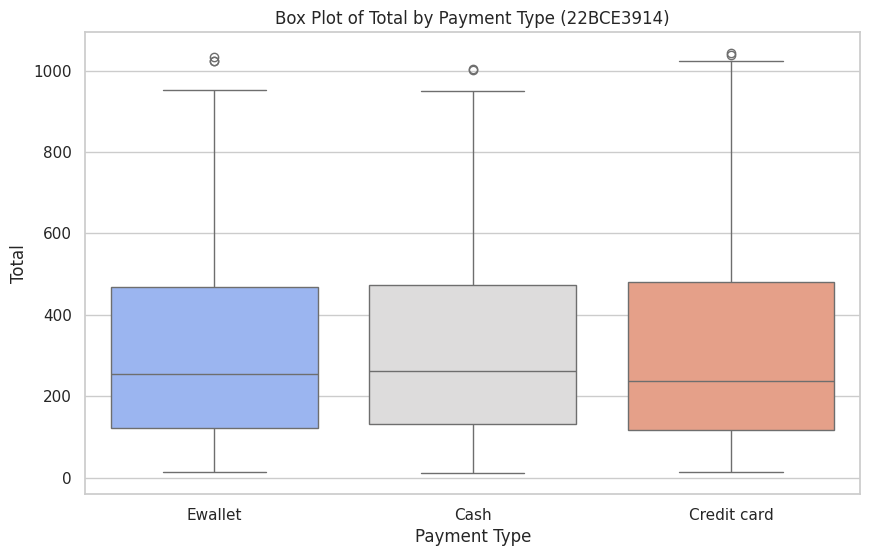

In [78]:
# 2D Box Plot (Total by Payment Type)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Payment', y='Total', data=df, palette='coolwarm')
plt.title("Box Plot of Total by Payment Type (22BCE3914)")
plt.xlabel("Payment Type")
plt.ylabel("Total")
plt.show()


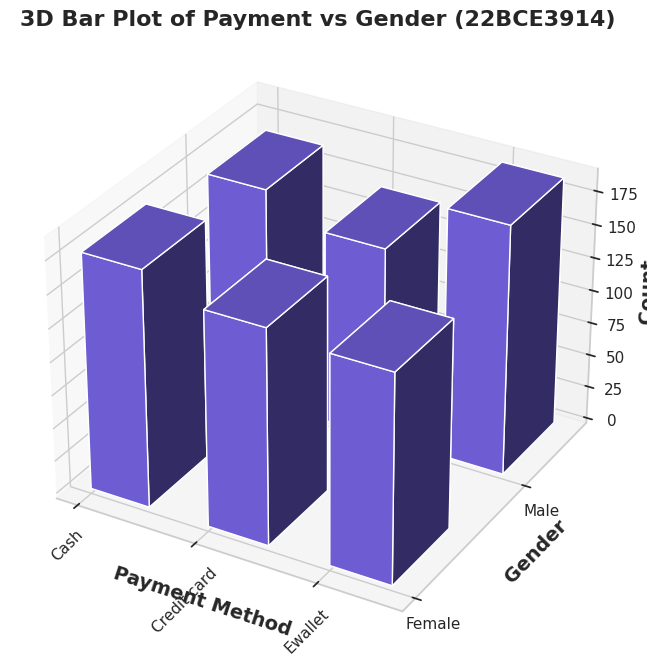

In [77]:
# 3D Bar Plot (Payment vs Gender)


import numpy as np

bar_table = pd.crosstab(df['Payment'], df['Gender'])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = np.arange(len(bar_table.index))
y = np.arange(len(bar_table.columns))
x, y = np.meshgrid(x, y, indexing='ij')
z = np.zeros_like(x)
dx = dy = 0.5
dz = bar_table.values.flatten()

ax.bar3d(x.flatten(), y.flatten(), z.flatten(), dx, dy, dz, shade=True, color='mediumslateblue')

ax.set_xlabel('Payment Method', fontsize=14, fontweight='bold')
ax.set_ylabel('Gender', fontsize=14, fontweight='bold')
ax.set_zlabel('Count', fontsize=14, fontweight='bold')
ax.set_title('3D Bar Plot of Payment vs Gender (22BCE3914)', fontsize=16, fontweight='bold')
ax.set_xticks(np.arange(len(bar_table.index)))
ax.set_xticklabels(bar_table.index, rotation=45)
ax.set_yticks(np.arange(len(bar_table.columns)))
ax.set_yticklabels(bar_table.columns)
plt.show()


<ipython-input-76-dcb09122b3bc>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  radar_data = df.groupby('Customer type')[['Total', 'gross income', 'Rating']].mean()


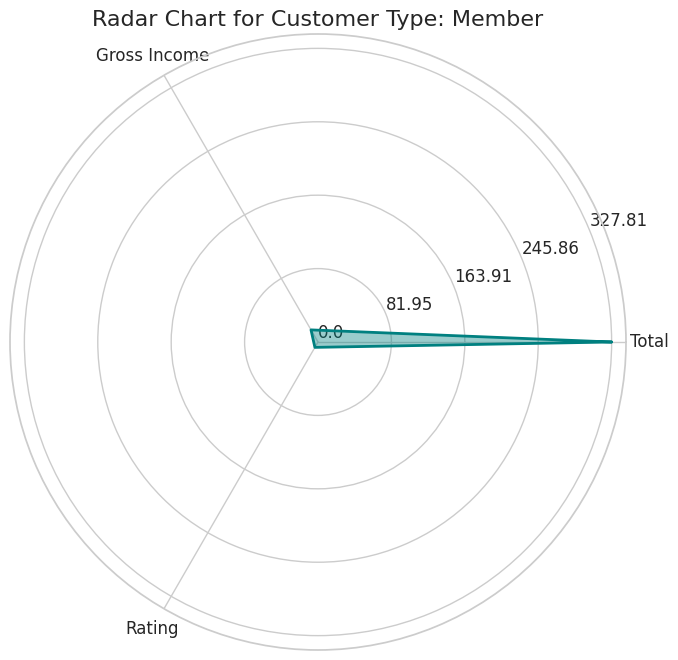

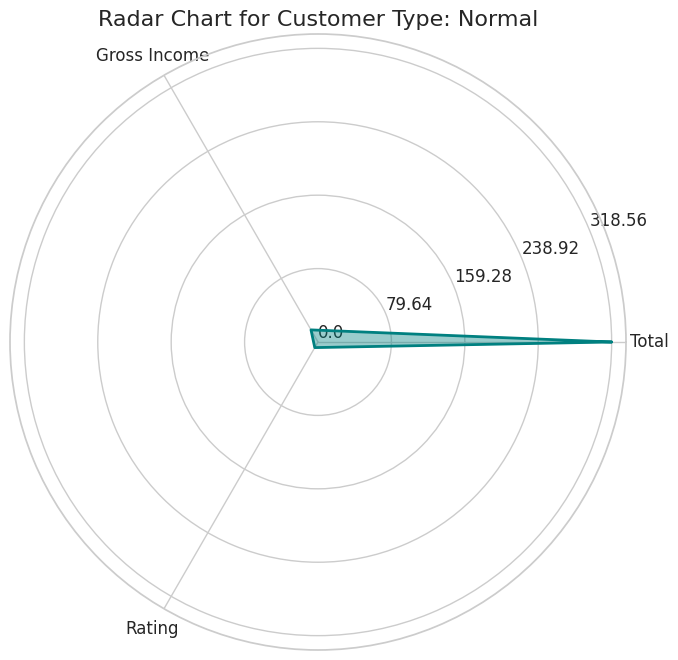

In [76]:
# Radar Chart (Customer Type-wise Averages)

def create_radar_chart(data, labels, title):
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    data = np.concatenate((data, [data[0]]))
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, data, color='teal', alpha=0.4)
    ax.plot(angles, data, color='teal', linewidth=2)
    ax.set_yticks(np.linspace(0, max(data), 5))
    ax.set_yticklabels([f"{round(i, 2)}" for i in np.linspace(0, max(data), 5)], fontsize=12)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    plt.title(title, size=16)
    plt.show()

# Use numerical features grouped by customer type
radar_data = df.groupby('Customer type')[['Total', 'gross income', 'Rating']].mean()
features = ['Total', 'Gross Income', 'Rating']

for cust in radar_data.index:
    create_radar_chart(radar_data.loc[cust].values, features, f'Radar Chart for Customer Type: {cust}')


# **MODULE 5**

# **K MEANS CLUSTERING**

In [79]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [88]:
# Check which columns contain NaN values
nan_columns = df_filtered.isnull().sum()
nan_columns = nan_columns[nan_columns > 0]  # Filter columns with NaN values

print("Columns with NaN values and their counts:\n")
print(nan_columns)


Columns with NaN values and their counts:

rolling_mean      11
diff_log_total     1
dtype: int64


In [92]:
df_filtered['rolling_mean'].fillna(df_filtered['rolling_mean'].median(), inplace=True)
df_filtered['diff_log_total'].fillna(df_filtered['diff_log_total'].median(), inplace=True)
# Check which columns contain NaN values
nan_columns = df_filtered.isnull().sum()
nan_columns = nan_columns[nan_columns > 0]  # Filter columns with NaN values

print("Columns with NaN values and their counts:\n")
print(nan_columns)


Columns with NaN values and their counts:

Series([], dtype: int64)


<ipython-input-92-908a873fedce>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered['rolling_mean'].fillna(df_filtered['rolling_mean'].median(), inplace=True)
<ipython-input-92-908a873fedce>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

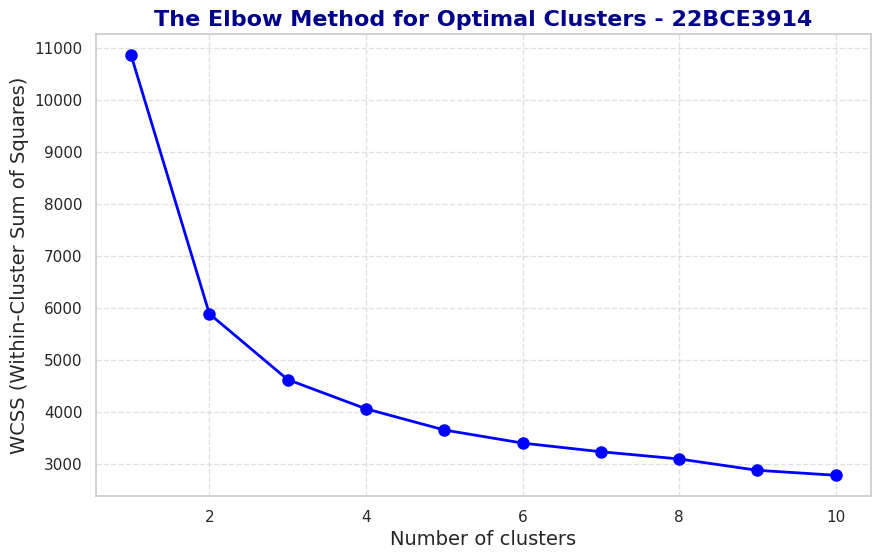

In [93]:
# Using the Elbow Method to Find the Optimal Number of Clusters

# Load the cleaned dataset
X = df_filtered.select_dtypes(include=['float64', 'int64'])

# Standardize the data for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use the elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares (WCSS)
for i in range(1, 11):  # Check from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS to identify the elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
plt.title('The Elbow Method for Optimal Clusters - 22BCE3914', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Silhouette Score: 0.40860921906532155


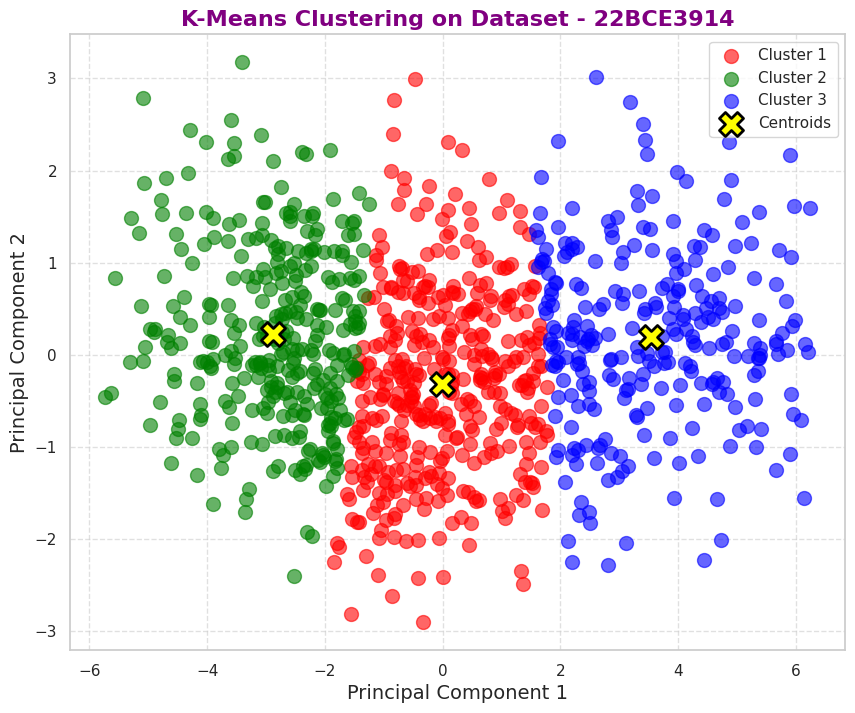

In [95]:
# Fit K-Means Clustering

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit K-Means with the optimal number of clusters )
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

# Calculate Silhouette Score
sil_score = silhouette_score(X_pca, y_kmeans)
print(f"Silhouette Score: {sil_score}")

# Visualizing Clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1', alpha=0.6)
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s=100, c='green', label='Cluster 2', alpha=0.6)
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s=100, c='blue', label='Cluster 3', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids', marker='X', edgecolors='black', linewidths=2)
plt.title('K-Means Clustering on Dataset - 22BCE3914', fontsize=16, fontweight='bold', color='purple')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [96]:
# Calculate Distance Metrics
euclidean_distances = cdist(X_pca, kmeans.cluster_centers_, 'euclidean')
manhattan_distances = cdist(X_pca, kmeans.cluster_centers_, 'cityblock')
cosine_distances = cdist(X_pca, kmeans.cluster_centers_, 'cosine')

# Print the first 5 distances for each type
print('Euclidean Distances (first 5 points):\n', euclidean_distances[:5])
print('Manhattan Distances (first 5 points):\n', manhattan_distances[:5])
print('Cosine Distances (first 5 points):\n', cosine_distances[:5])

Euclidean Distances (first 5 points):
 [[1.80202866 1.13268865 5.35189015]
 [1.35534813 4.26271424 2.25843007]
 [5.44215797 8.35486125 2.11670592]
 [1.44440621 1.48341537 4.99736982]
 [1.20882126 1.73851318 4.69082601]]
Manhattan Distances (first 5 points):
 [[1.99230036 1.42137907 5.64873413]
 [1.37051503 4.78419446 2.71958833]
 [5.90903475 9.32271418 2.86375046]
 [1.60824359 1.80543583 5.31903078]
 [1.54681176 1.86686766 4.78752035]]
Cosine Distances (first 5 points):
 [[9.07699997e-01 1.00725378e-02 1.99995652e+00]
 [7.89628829e-01 1.98685284e+00 4.32156559e-02]
 [8.81787689e-01 1.99762952e+00 2.02517417e-02]
 [8.73622214e-01 1.55072683e-02 1.99904923e+00]
 [1.05244537e+00 4.05626310e-06 1.99082364e+00]]


In [104]:
# Hierarchical Clustering
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
# Select only numerical data types
df_numeric = df_filtered.select_dtypes(include=['float64', 'int64'])


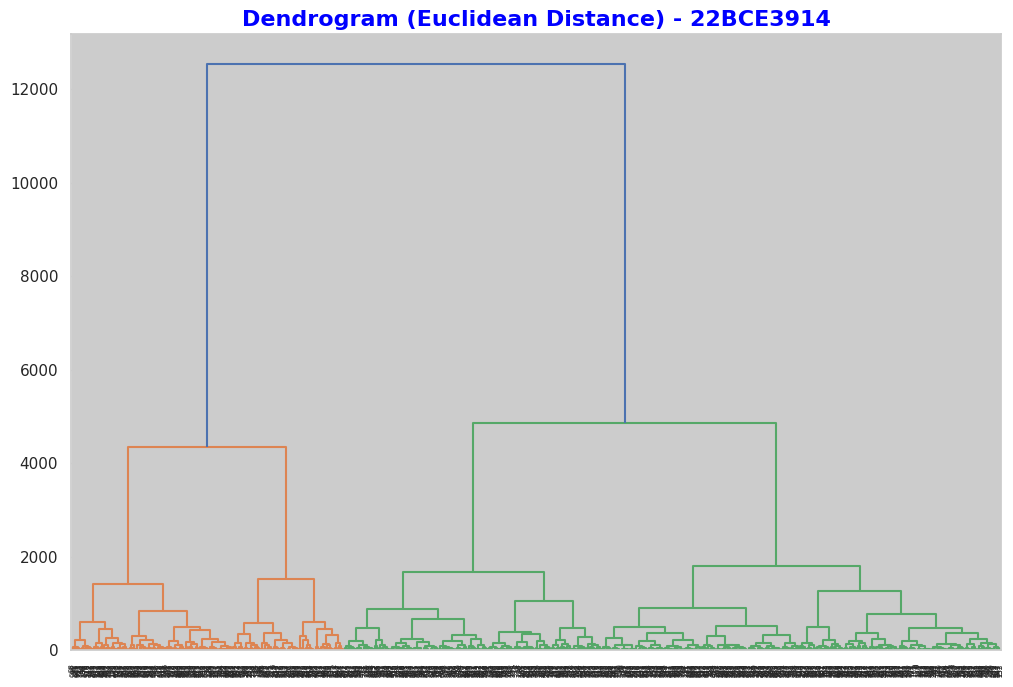

In [105]:
# Dendrogram for Euclidean Distance

euclidean_distances = pdist(df_numeric, metric='euclidean')
linked = linkage(euclidean_distances, method='ward')
plt.figure(figsize=(12, 8))
plt.title('Dendrogram (Euclidean Distance) - 22BCE3914', fontsize=16, fontweight='bold', color='blue')
dendrogram(linked)
plt.show()

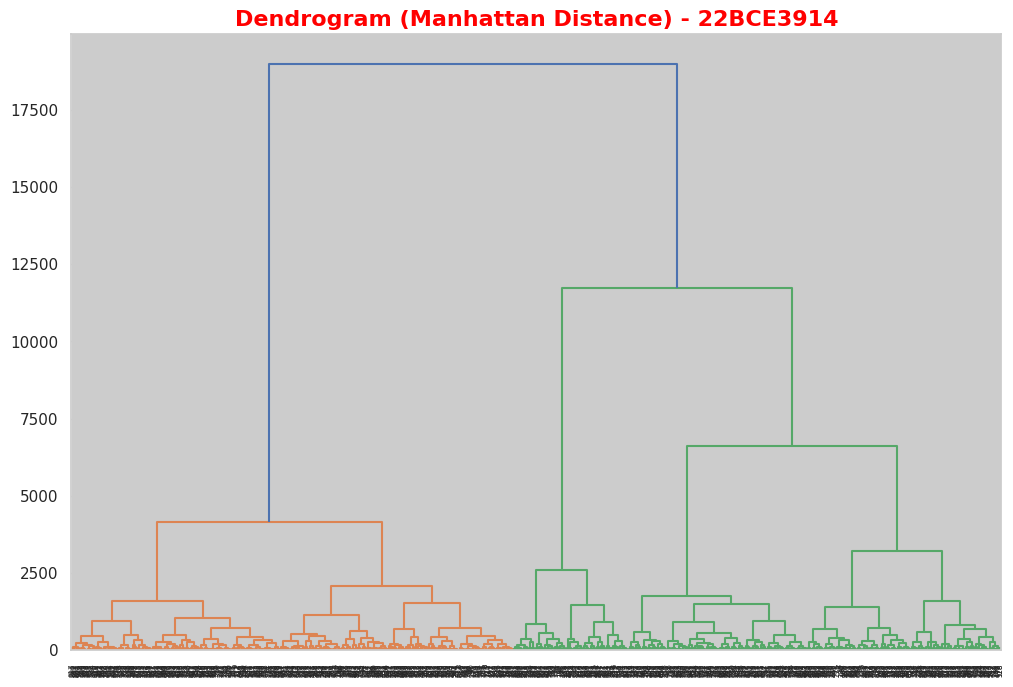

In [106]:
# Dendrogram for Manhattan Distance
manhattan_distances = pdist(df_numeric, metric='cityblock')
linked_manhattan = linkage(manhattan_distances, method='ward')
plt.figure(figsize=(12, 8))
plt.title('Dendrogram (Manhattan Distance) - 22BCE3914', fontsize=16, fontweight='bold', color='red')
dendrogram(linked_manhattan)
plt.show()


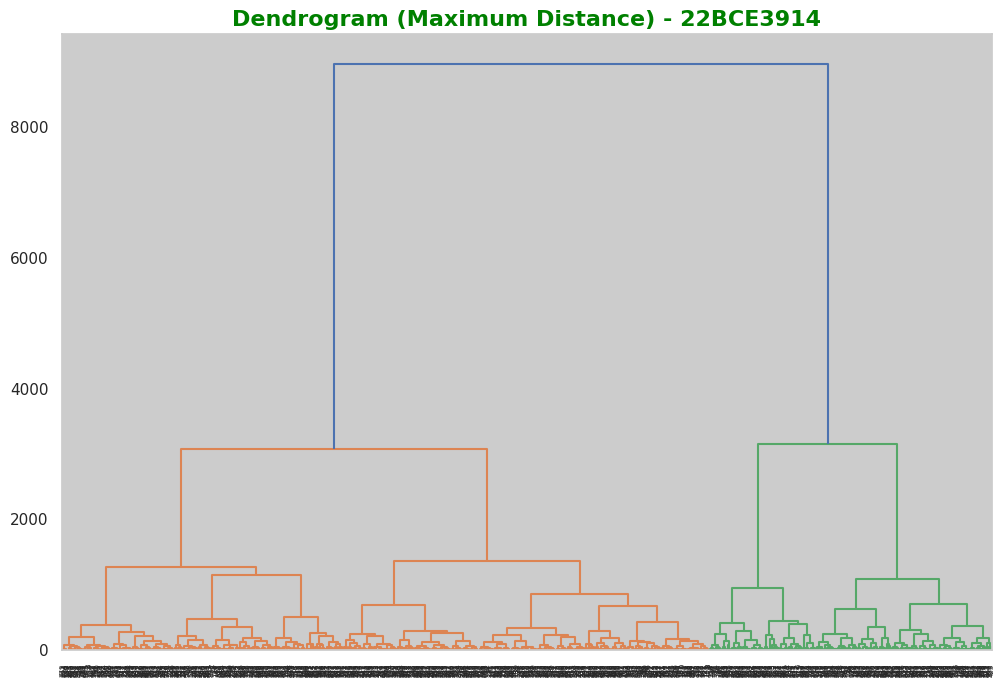

In [108]:
#Dendrogram for Maximum Distance

maximum_distances = pdist(df_numeric, metric='chebyshev')
linked_maximum = linkage(maximum_distances, method='ward')
plt.figure(figsize=(12, 8))
plt.title('Dendrogram (Maximum Distance) - 22BCE3914', fontsize=16, fontweight='bold', color='green')
dendrogram(linked_maximum)
plt.show()

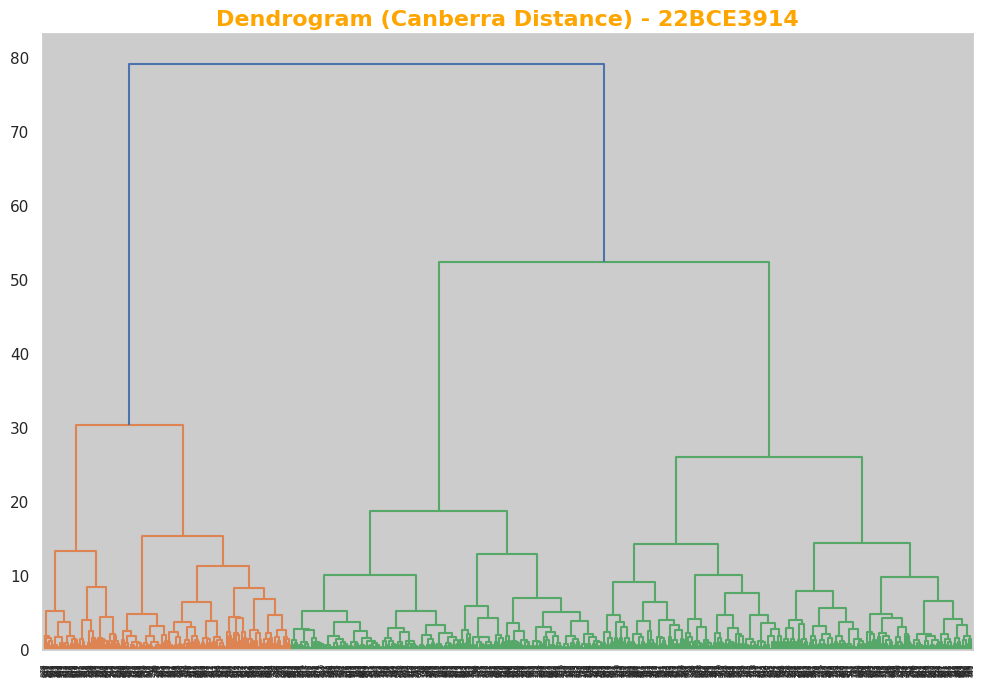

In [111]:
# Dendrogram for Canberra Distance

canberra_distances = pdist(df_numeric, metric='canberra')
linked_canberra = linkage(canberra_distances, method='ward')
plt.figure(figsize=(12, 8))
plt.title('Dendrogram (Canberra Distance) - 22BCE3914', fontsize=16, fontweight='bold', color='orange')
dendrogram(linked_canberra)
plt.show()


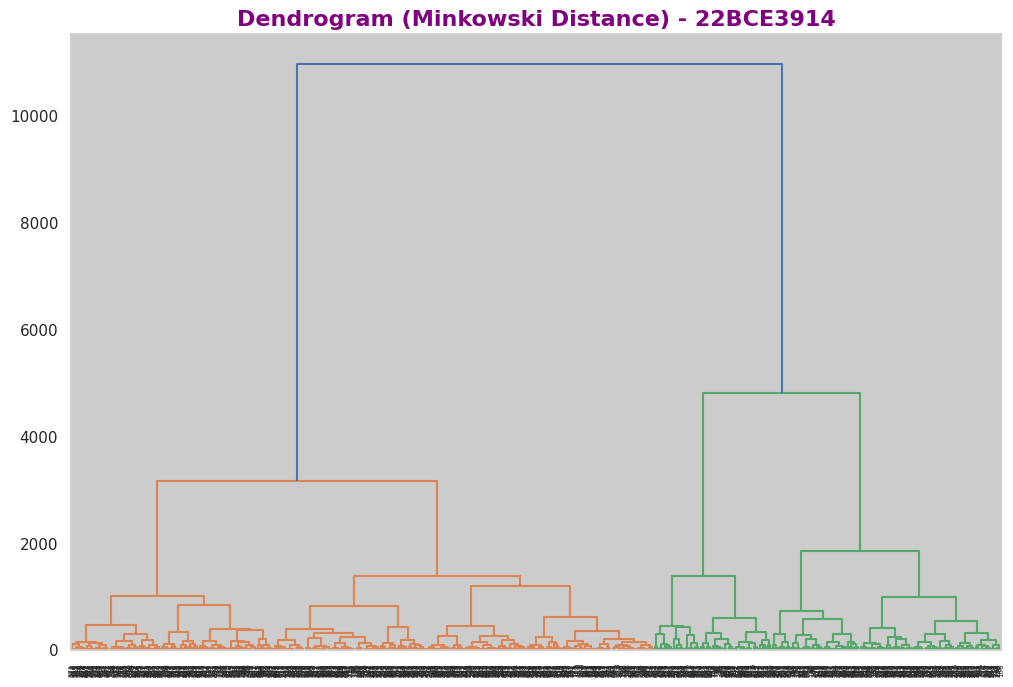

In [112]:
# Dendrogram for Minkowski Distance


minkowski_distances = pdist(df_numeric, metric='minkowski', p=3)
linked_minkowski = linkage(minkowski_distances, method='ward')
plt.figure(figsize=(12, 8))
plt.title('Dendrogram (Minkowski Distance) - 22BCE3914', fontsize=16, fontweight='bold', color='purple')
dendrogram(linked_minkowski)
plt.show()


# **MODULE 6 : Principal Component Analysis**

In [113]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#Using the already created df_numeric dataset
df_numeric.head()

Unit price  Quantity  Tax 5%    Total    cogs  \
Date                                                        
2019-01-01       63.22         2   6.322  132.762  126.44   
2019-01-01       47.59         8  19.036  399.756  380.72   
2019-01-01       84.63        10  42.315  888.615  846.30   
2019-01-01       21.12         8   8.448  177.408  168.96   
2019-01-01       29.22         6   8.766  184.086  175.32   

            gross margin percentage  gross income  Rating  log_Total  \
Date                                                                   
2019-01-01                 4.761905         6.322     8.5   4.896062   
2019-01-01                 4.761905        19.036     5.7   5.993353   
2019-01-01                 4.761905        42.315     9.0   6.790789   
2019-01-01                 4.761905         8.448     6.3   5.184073   
2019-01-01                 4.761905         8.766     5.0   5.220821   

            rolling_mean  log_total  diff_log_total  
Date                                                 
2019-01-01    309.336125   4.888558        0.041000  
2019-01-01    309.336125   5.990854        1.102296  
2019-01-01    309.336125   6.789664        0.798810  
2019-01-01    309.336125   5.178452       -1.611212  
2019-01-01    309.336125   5.215403        0.036951

In [114]:
# Standardize the numerical data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_numeric)


In [115]:
# Perform PCA on standardized data
pca = PCA()
pca.fit(data_scaled)

# Explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio


array([6.57253899e-01, 9.34341165e-02, 9.22117826e-02, 8.89812511e-02,
       4.47408037e-02, 1.94765400e-02, 3.90097927e-03, 6.28007641e-07,
       7.13798476e-18, 6.67289525e-19, 0.00000000e+00, 0.00000000e+00])

In [116]:
# Print explained variance ratio (Eigenvalues)
print("Explained Variance Ratio (Eigenvalues):\n", explained_variance_ratio)

# Print component loadings (PCA component coefficients)
component_loadings = pca.components_
print("\nComponent Loadings (Coefficients):\n", component_loadings)


Explained Variance Ratio (Eigenvalues):
 [6.57253899e-01 9.34341165e-02 9.22117826e-02 8.89812511e-02
 4.47408037e-02 1.94765400e-02 3.90097927e-03 6.28007641e-07
 7.13798476e-18 6.67289525e-19 0.00000000e+00 0.00000000e+00]

Component Loadings (Coefficients):
 [[ 2.37683387e-01  2.71310621e-01  3.64705522e-01  3.64705522e-01
   3.64705522e-01  0.00000000e+00  3.64705522e-01 -8.76078137e-03
   3.58512819e-01  1.11693703e-01  3.58088347e-01  2.61812419e-01]
 [ 2.84038141e-01 -2.73087704e-01  3.01380205e-02  3.01380205e-02
   3.01380205e-02 -0.00000000e+00  3.01380205e-02 -4.72679327e-01
  -5.55261278e-02  7.17160849e-01 -5.62126464e-02 -3.11646911e-01]
 [ 6.28670672e-01 -5.42215426e-01  3.43661147e-03  3.43661147e-03
   3.43661147e-03  1.38777878e-17  3.43661147e-03  5.50673090e-01
  -5.24935934e-03 -7.74676273e-02 -5.23697495e-03  3.78326576e-02]
 [-2.93143130e-01  2.61016938e-01  1.11227568e-02  1.11227568e-02
   1.11227568e-02  2.77555756e-17  1.11227568e-02  6.86987065e-01
  -4.0620

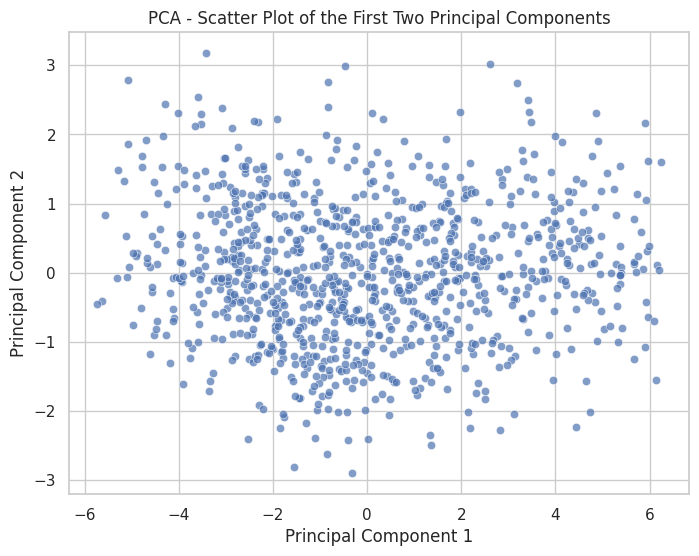

In [117]:
# Transform data using PCA
pc_df = pd.DataFrame(pca.transform(data_scaled), columns=[f"PC{i+1}" for i in range(pca.n_components_)])

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pc_df['PC1'], y=pc_df['PC2'], alpha=0.7)
plt.title('PCA - Scatter Plot of the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


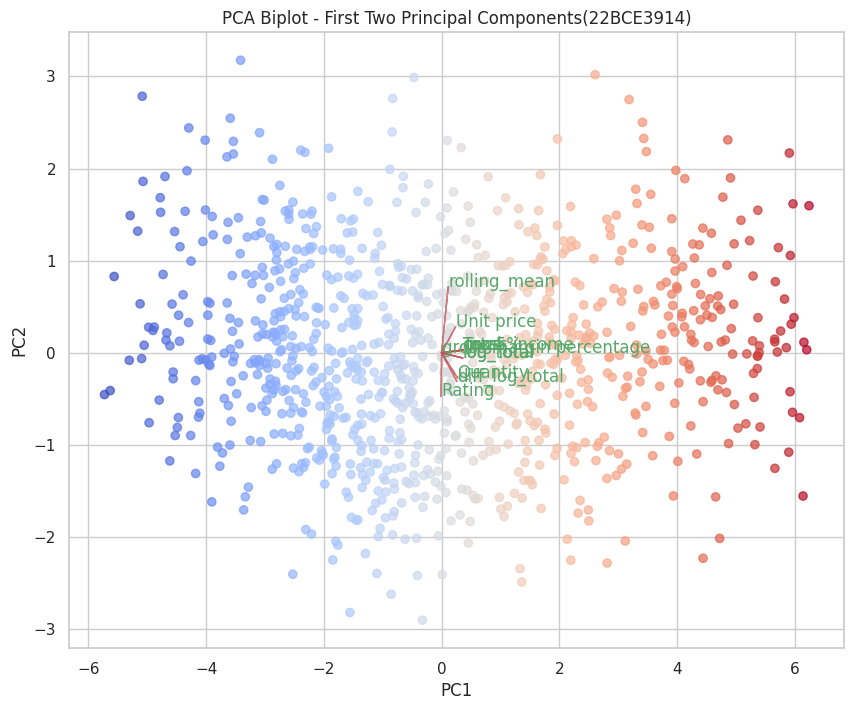

In [120]:
#Biplot

def biplot(score, coeff, labels=None, scale=1):
    xs = score[:, 0]
    ys = score[:, 1]
    plt.figure(figsize=(10, 8))
    plt.scatter(xs, ys, alpha=0.7, c=xs, cmap='coolwarm')

    for i in range(len(coeff)):
        plt.arrow(0, 0, coeff[i, 0] * scale, coeff[i, 1] * scale, color='r', alpha=0.7)
        if labels is None:
            plt.text(coeff[i, 0] * scale, coeff[i, 1] * scale, "Var" + str(i + 1), color='g')
        else:
            plt.text(coeff[i, 0] * scale, coeff[i, 1] * scale, labels[i], color='g')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.title('PCA Biplot - First Two Principal Components(22BCE3914)')
    plt.show()

# Call biplot function
biplot(pc_df[['PC1', 'PC2']].values, np.transpose(pca.components_), labels=df_numeric.columns)


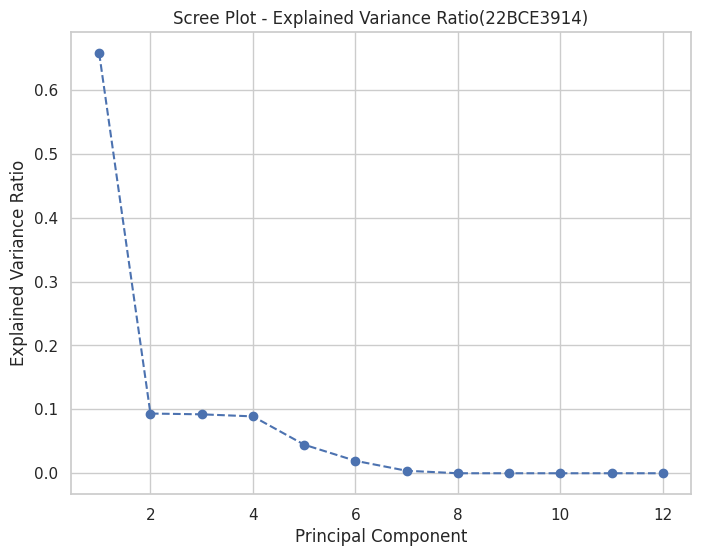

In [122]:
# Scree Plot

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Scree Plot - Explained Variance Ratio(22BCE3914)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()


In [123]:
n_comp = 5  # choosing number of components based on the scree plot
pca = PCA(n_components=n_comp)
data_pca = pca.fit_transform(data_scaled)

print(f"Explained variance ratio for the first {n_comp} components: {pca.explained_variance_ratio_}")


Explained variance ratio for the first 5 components: [0.6572539  0.09343412 0.09221178 0.08898125 0.0447408 ]


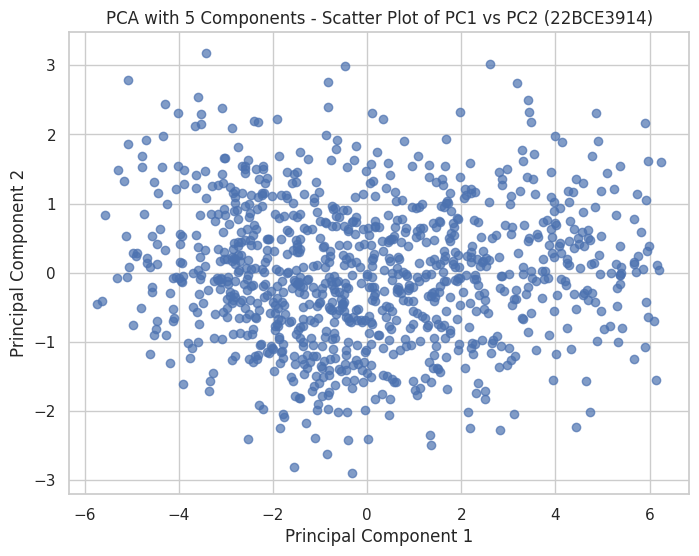

In [126]:
# Perform PCA with selected components

pca = PCA(n_components=n_comp)
data_pca = pca.fit_transform(data_scaled)

# Convert transformed data to DataFrame
pc_df = pd.DataFrame(data_pca, columns=[f"PC{i+1}" for i in range(n_comp)])

# Scatter plot for the first two components
plt.figure(figsize=(8, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.7, color='b')
plt.title(f'PCA with {n_comp} Components - Scatter Plot of PC1 vs PC2 (22BCE3914)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


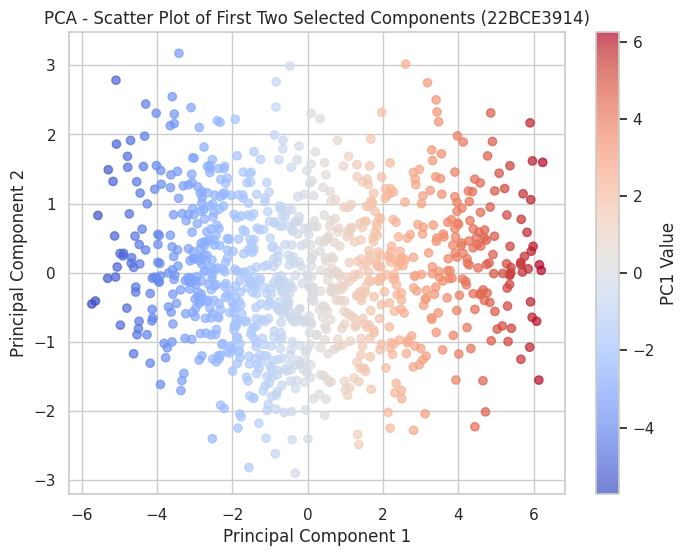

In [128]:
#Plot selected PCA Components

plt.figure(figsize=(8, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.7, c=pc_df['PC1'], cmap='coolwarm')
plt.colorbar(label='PC1 Value')
plt.title('PCA - Scatter Plot of First Two Selected Components (22BCE3914)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


Explained Variance Ratio: [0.6572539  0.09343412 0.09221178 0.08898125 0.0447408 ]
Cumulative Explained Variance: [0.6572539  0.75068802 0.8428998  0.93188105 0.97662185]


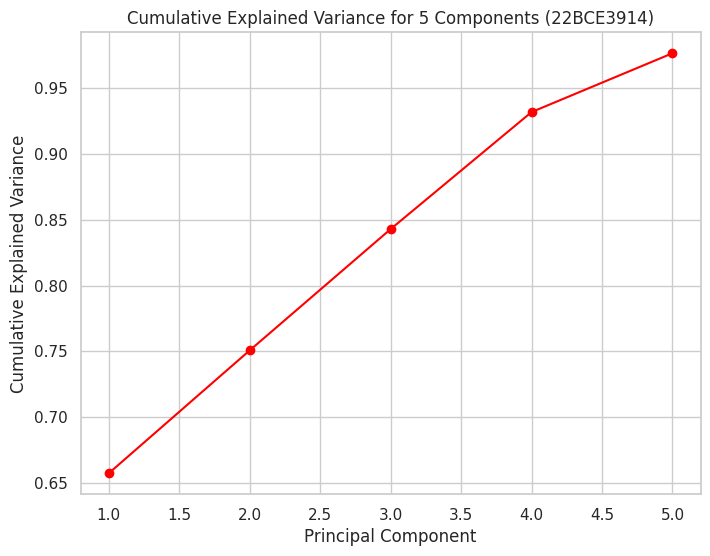

In [133]:
#Interpret the results
# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Print explained variance and cumulative variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", cumulative_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='red')
plt.title(f'Cumulative Explained Variance for {n_comp} Components (22BCE3914)')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


# **MODULE 7**

In [205]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/supermarket_sales.csv')



In [167]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   01/05/19   
1  Electronic accessories       15.28         5   3.8200   80.2200   03/08/19   
2      Home and lifestyle       46.33         7  16.2155  340.5255   03/03/19   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   02/08/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [206]:
#Handling dataset by checking for missing values and filling the missing values with median and mode

# Checking for missing values before data handling
print(df.isnull().sum())



Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     2
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    1
cogs                       0
gross margin percentage    1
gross income               0
Rating                     1
dtype: int64


In [207]:
#Separating numeric and non numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

# Filling missing values for numeric columns with the median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Filling missing values for non-numeric columns with the mode (most frequent value)
for col in non_numeric_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

#Checking for any remaining missing values after data handling
print(df.isnull().sum())


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


<ipython-input-207-68b28d0d551c>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [208]:
#checking for unmatched data in customer type rows
print(df['Customer type'].unique())
print(df['Customer type'].value_counts())




['Member' 'Normal' '?' '>']
Customer type
Member    501
Normal    497
?           1
>           1
Name: count, dtype: int64


In [209]:
#removing the rows containing '?' and '>' from the customer type column
df = df[df['Customer type'].isin(['Member', 'Normal'])]

#checking the customer type column again
print(df['Customer type'].unique())
print(df['Customer type'].value_counts())

# Remove rows where Gender is '?'
df = df[df['Gender'] != '?']

# Reset index after dropping
df.reset_index(drop=True, inplace=True)

# Verify that '?' values are removed
print(df['Gender'].unique())


['Member' 'Normal']
Customer type
Member    501
Normal    497
Name: count, dtype: int64
['Female' 'Male']


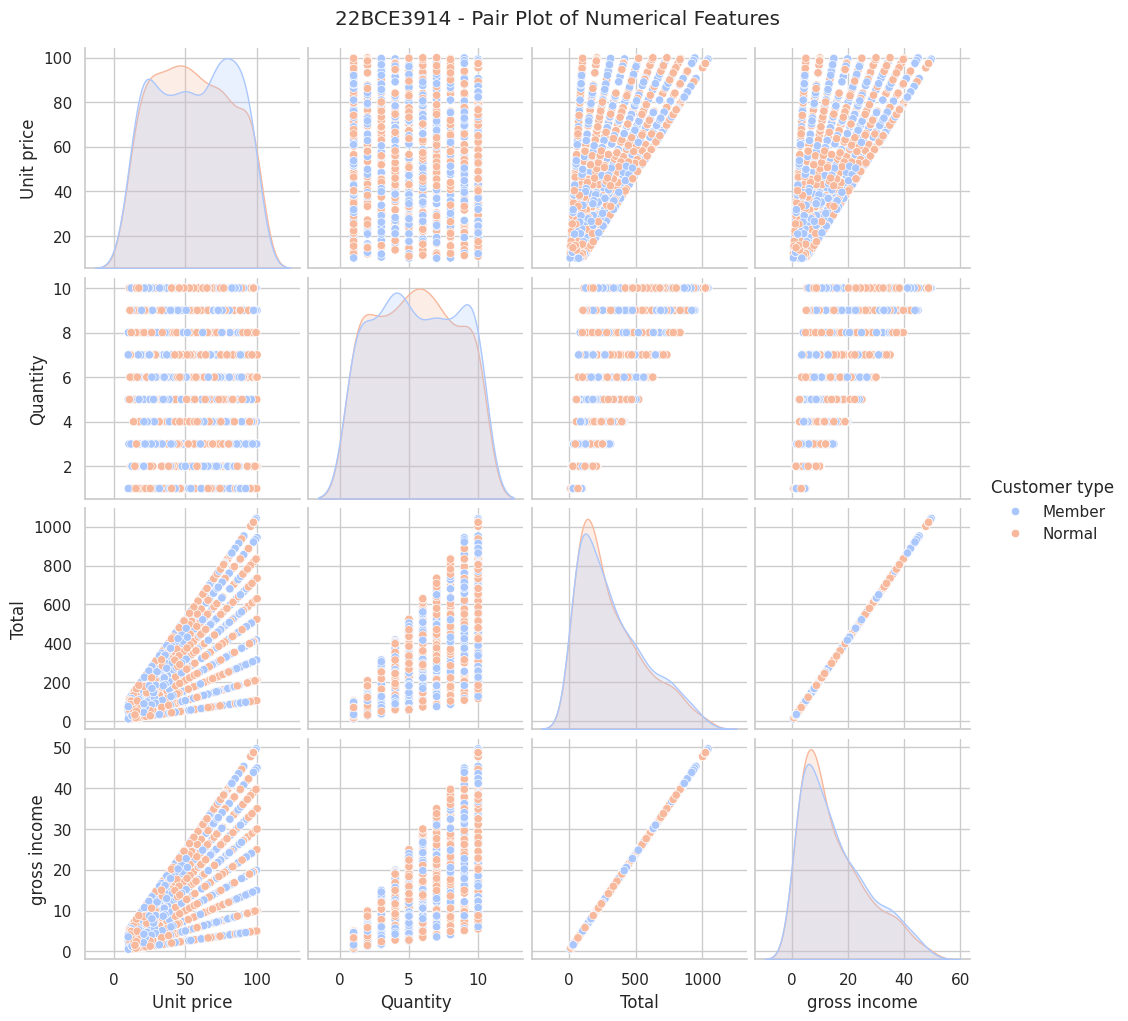

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identifying relationships
sns.pairplot(df[['Unit price', 'Quantity', 'Total', 'gross income', 'Customer type']],
             hue='Customer type', palette="coolwarm")

plt.suptitle("22BCE3914 - Pair Plot of Numerical Features", y=1.02)
plt.show()


In [211]:
#Split the Dataset into Training and Test Sets

from sklearn.model_selection import train_test_split

# Independent (X) and Dependent (Y) Variables
X = df[['Unit price']]  # Predictor
y = df['Total']         # Target

# Splitting into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [212]:
#Simple Linear Regression

from sklearn.linear_model import LinearRegression

# Initialize and fit the model
reg1 = LinearRegression()
reg1.fit(X_train, y_train)

# Print the coefficients
print(f"Coefficient: {reg1.coef_[0]}")
print(f"Intercept: {reg1.intercept_}")


Coefficient: 5.759488970967926
Intercept: 5.963449941924409


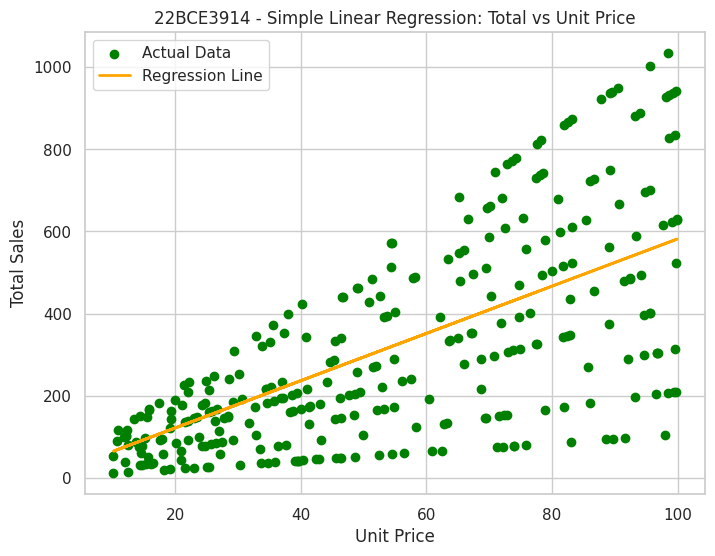

In [213]:
# Predict and Visualize Test Results

# Predict test results
y_pred = reg1.predict(X_test)

# Scatter plot with regression line
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='Green', label='Actual Data')
plt.plot(X_test, y_pred, color='orange', linewidth=2, label='Regression Line')

plt.xlabel("Unit Price")
plt.ylabel("Total Sales")
plt.title("22BCE3914 - Simple Linear Regression: Total vs Unit Price")
plt.legend()
plt.grid(True)
plt.show()


In [214]:
# Multiple Linear Regression

import numpy as np

# Log transformation for gross income to normalize
df['log_gross_income'] = np.log(df['gross income'] + 1)

# Independent variables
X_multi = df[['Unit price', 'Quantity', 'log_gross_income']]
y_multi = df['Total']

# Split dataset
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.3, random_state=42)

# Fit model
reg2 = LinearRegression()
reg2.fit(X_train_multi, y_train_multi)

# Print coefficients
print("Coefficients:", reg2.coef_)
print("Intercept:", reg2.intercept_)


Coefficients: [ 4.36076221 43.78801685 79.03636094]
Intercept: -361.4152907742853


Residuals:
 453     78.375959
792    108.602306
209    144.734564
309     35.248745
739    -54.044812
Name: Total, dtype: float64
      Predicted   Residuals
453  653.054041   78.375959
792  -51.524306  108.602306
209  736.572436  144.734564
309   39.458755   35.248745
739  204.467812  -54.044812


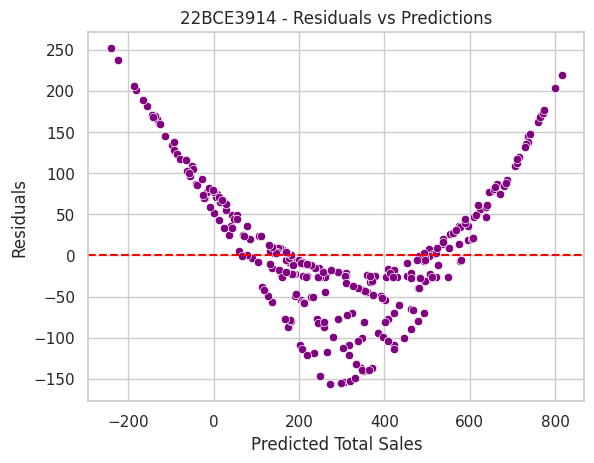

In [215]:
# Residual Analysis & Prediction

# Predictions
y_pred_multi = reg2.predict(X_test_multi)

# Compute residuals
residuals = y_test_multi - y_pred_multi
print("Residuals:\n", residuals.head())

# Create DataFrame for predictions and residuals
pred_residuals = pd.DataFrame({'Predicted': y_pred_multi, 'Residuals': residuals})
print(pred_residuals.head())

# Residuals vs Predicted scatter plot
sns.scatterplot(x=pred_residuals['Predicted'], y=pred_residuals['Residuals'], color="purple")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Total Sales")
plt.ylabel("Residuals")
plt.title("22BCE3914 - Residuals vs Predictions")
plt.show()


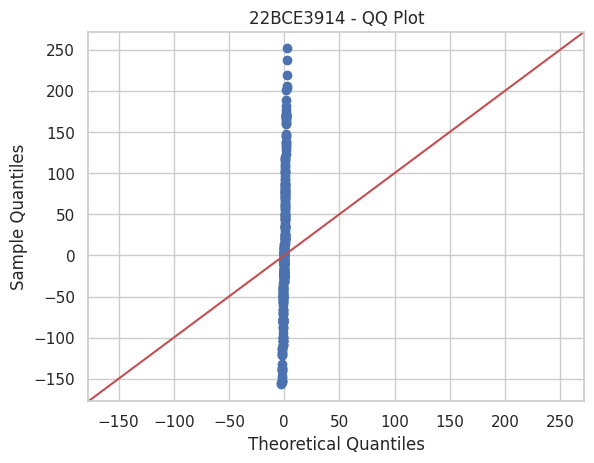

In [216]:
# Q-Q Plot
import statsmodels.api as sm

# QQ Plot
sm.qqplot(residuals, line='45')
plt.title("22BCE3914 - QQ Plot")
plt.show()



In [217]:
from sklearn.linear_model import LogisticRegression

# Convert Customer type to binary (Member = 1, Normal = 0)
df['Customer type'] = df['Customer type'].map({'Member': 1, 'Normal': 0})

# Independent and dependent variables
X_log = df[['Total']]  # Feature
y_log = df['Customer type']  # Target

# Split data
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.3, random_state=42)

# Initialize and fit Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_log, y_train_log)

# Predict
y_pred_log = log_reg.predict(X_test_log)


In [218]:
# Evaluate Logistic Regression Mode

from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test_log, y_pred_log)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_test_log, y_pred_log)
print("Classification Report:\n", cr)


Confusion Matrix:
 [[118  23]
 [132  27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.84      0.60       141
           1       0.54      0.17      0.26       159

    accuracy                           0.48       300
   macro avg       0.51      0.50      0.43       300
weighted avg       0.51      0.48      0.42       300



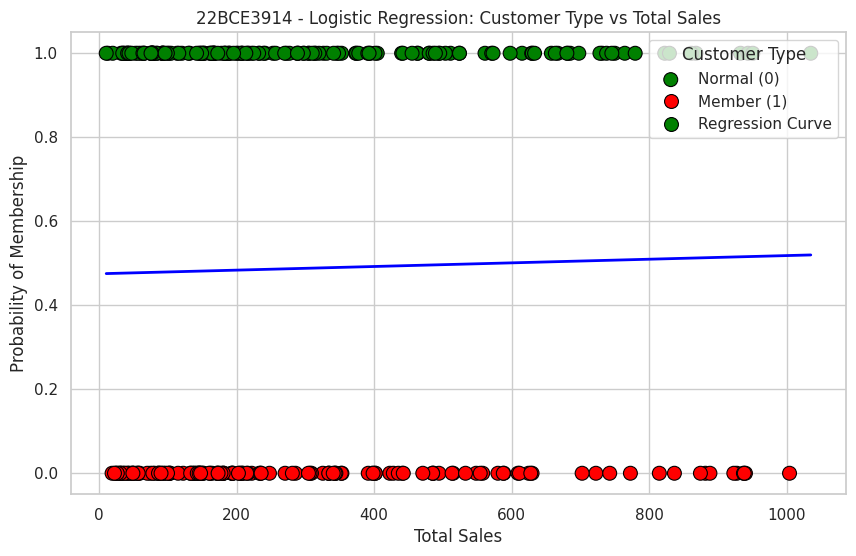

In [219]:
## Visualizing Logistic Regression Results

# Get probabilities
predicted_probabilities = log_reg.predict_proba(X_test_log)[:, 1]

# Sort for smooth plotting
sorted_indices = X_test_log['Total'].argsort()
sorted_X_test = X_test_log.iloc[sorted_indices]
sorted_probabilities = predicted_probabilities[sorted_indices]

# Create plot
plt.figure(figsize=(10,6))

# Scatter plot of actual values
sns.scatterplot(x=X_test_log['Total'], y=y_test_log, hue=y_test_log, palette=["red", "green"], s=100, edgecolor="black")

# Logistic regression curve
plt.plot(sorted_X_test['Total'], sorted_probabilities, color='blue', linewidth=2)

# Labels and title with reg no
plt.xlabel("Total Sales")
plt.ylabel("Probability of Membership")
plt.title("22BCE3914 - Logistic Regression: Customer Type vs Total Sales")
plt.legend(title="Customer Type", labels=["Normal (0)", "Member (1)", "Regression Curve"])
plt.show()
